# Метод (алгоритм) k-ближайших соседей
Английское название: k-nearest neighbors (k-NN или kNN или KNN).

### Краткое описание метода
- Значение целевого признака определяется на основе значений целевых признаков тех объектов, которые находятся ближе всего к искомому объекту в пространстве признаков. Один из наиболее простых методов.

- Исторически является одним из наиболее известных методов. В терминологии Data Mining рассматривался как основной алгоритм поиска по прецедентам.

- Указать автора алгоритма довольно сложно. В статье http://37steps.com/4370/nn-rule-invention/ отмечается что метод был предложен много раз в различных вариантах. 

- Метод может использоваться как для классификации, так и для регресии.

- Как правило, метод k-NN показывает худшее качество, по сравнению с другими, более сложными методами.

## Постановка задачи
Пусть дана обучающая выборка:
- $X^{train}$ - матрица объекты-признаки (feature matrix);
- если необходимо указать конкретный элемент матрицы, то будем использовать  обозначение $X_{o, f}^{train}$, где $o$ - индекс объекта (соответствуют строке матрицы), а $f$ - индекс признака (соответствуют столбцу матрицы);
- $Y^{train}$ - вектор целевого признака;
- если необходимо указать конкретный элемент вектора, то будем использовать  обозначение $Y_{o}^{train}$, где $o$ - индекс объекта (соответствуют индексу вектора);
- можно рассматривать $X^{train}|Y^{train}$ как блочную матрицу, количество  строк в матрице $X^{train}$ соответствует размерности вектора $Y^{train}$.

На основании алгоритма $Alg$, который использует гиперпараметры $H$, для обучающей выборки строится модель $M:X^{train} \rightarrow Y^{train}$, которая устанавливает соответствие между $X^{train}$ и $Y^{train}$: $M=Alg.fit(X^{train},Y^{train},H)$.

Также дана тестовая выборка $X^{test}$ для которой на основании найденной модели $M$  необходимо найти (предсказать) значения  $Y^{test}=Alg.predict(M, X^{test})$.

В случае k-NN:
- в качестве алгоритма $Alg$ используется метод k-ближайших соседей;
- количество ближайших соседей $k$ является гиперпараметром алгоритма, то есть до начала работы алгоритма необходимо задать количество ближайших соседей $K$, значения $Y^{train}$ которых будут использованы для нахождения   $Y^{test}$.

## Идея алгоритма

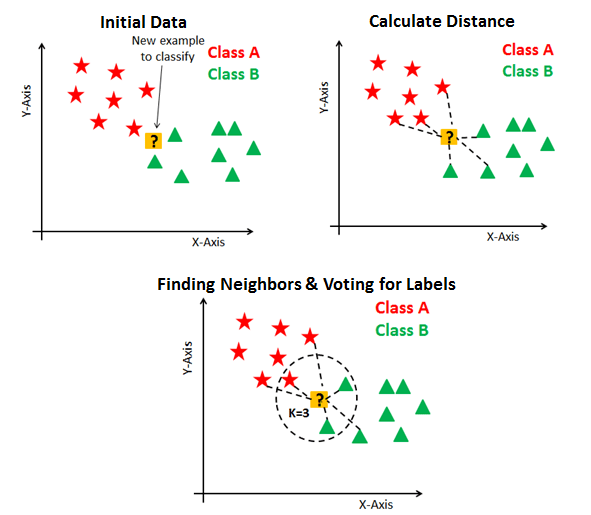

In [79]:
from IPython.display import Image

# Источник - https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
Image("img/knn.png")

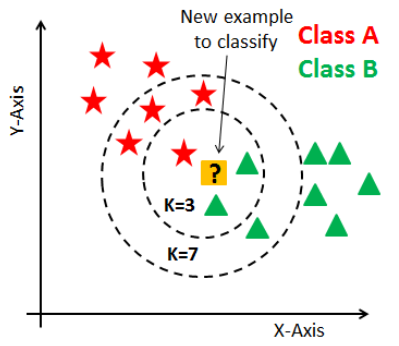

In [80]:
Image("img/knn_hyper_k.png")

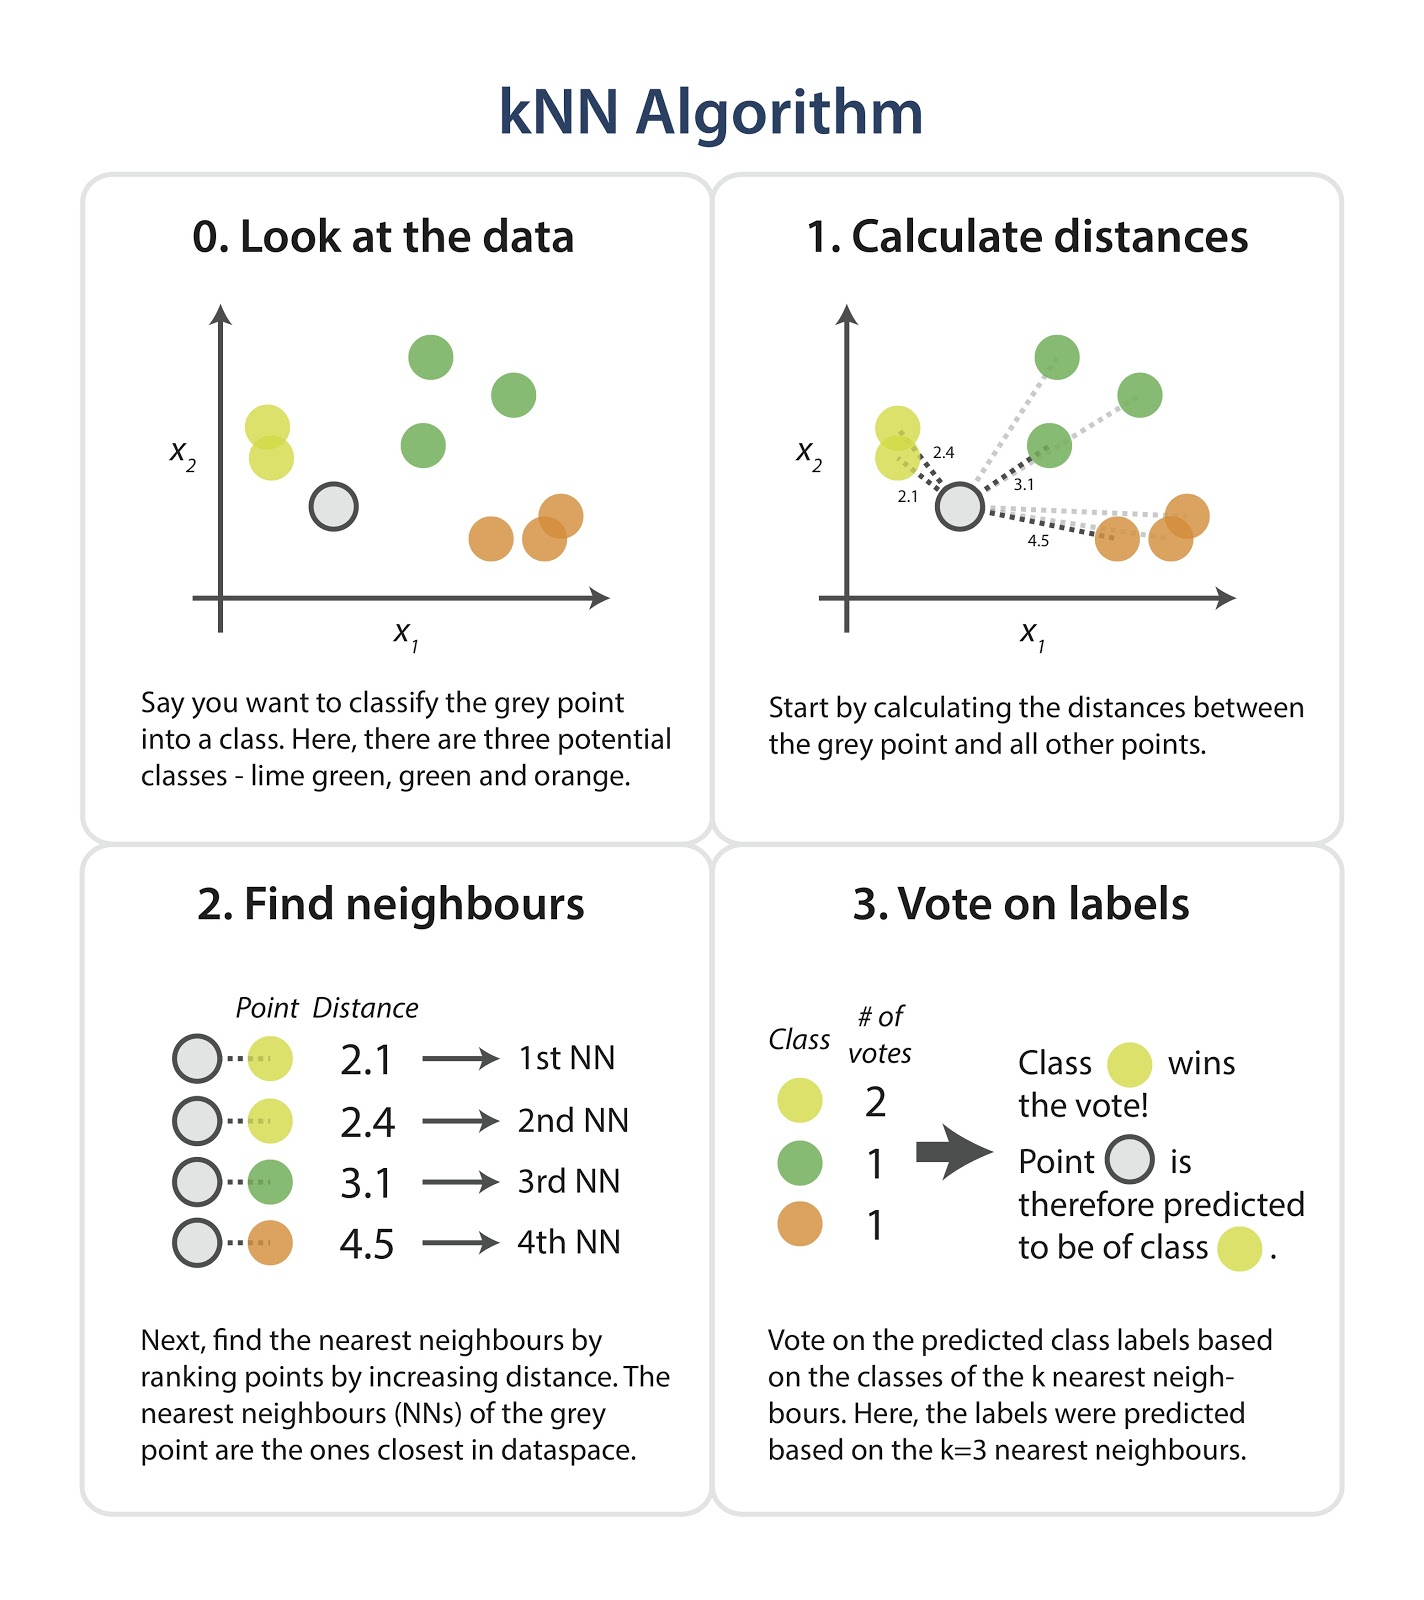

In [81]:
# Источник - https://www.kdnuggets.com/2016/01/implementing-your-own-knn-using-python.html
Image("img/knn2.jpg", width=700)

## Простая реализация алгоритма

### Реализация на языке Python

In [82]:
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import math

In [83]:
from enum import Enum
class PredictionType(Enum):
    CLASSIFICATION = 1
    REGRESSION = 2

In [84]:
class SimpleKNN:
    
    def fit(self, X_train: np.matrix, y_train: np.ndarray):
        """
        Метод обучения, который фактически не учится, 
        а только запоминает обучающую выборку.
        Входные параметры:
        X_train - обучающая выборка (матрица объект-признак)
        y_train - обучающая выборка (вектор целевого признака)
        Возвращаемое значение: нет
        """
        #Сохраняем параметры в переменных класса
        self._X_train = X_train
        self._y_train = y_train
          
    def eucl_dist(self, p: np.ndarray, q: np.ndarray) -> float:
        """
        Вычисление Евклидова расстояния - https://en.wikipedia.org/wiki/Euclidean_distance 
        Входные параметры:
        p, q - вектора в n-мерном пространстве признаков
        """
        return math.sqrt(sum([(pi - qi) ** 2 for pi, qi in zip (p, q)]))
            
            
    def predict_for_single_object(self, K: int, \
                prediction_type: PredictionType, \
                X_o: np.ndarray, \
                verbose = True) -> np.ndarray:
        """
        Метод предсказания для одного объекта.
        Входные параметры:
        K - гиперпараметр, количество соседей 
        prediction_type - классификация или регрессия 
        X_o - строка матрицы объект-признак, соответствующая объекту
        verbose - флаг детального вывода
        Возвращаемое значение: предсказанное значение целевого признака
        """
        # список соседей
        neighbors_list = []
        # *** Находим ближайшие точки ***
        # Перебираем все точки обучающей выборки
        for i in range(self._X_train.shape[0]):
            # получаем текущую точку
            data_train_current_x = [x for x in self._X_train[['Attendance (%)','Stress_Level (1-10)']].iloc[i]]
            # и значение ее y
            data_train_current_y = self._y_train[i]
            # вычисляем расстояние
            dist = self.eucl_dist(X_o, data_train_current_x)
            # сохраняем в список соседей
            temp_res = (data_train_current_y, dist, data_train_current_x)
            neighbors_list.append(temp_res)
        # *** сортируем список соседей по возрастанию расстояния *** 
        # в кортеже элементы следуют в порядке (0,1,2), сортируем по первому элементу 
        neighbors_list_sorted = sorted(neighbors_list, key=itemgetter(1))
        if verbose:
            print()
            print('**************************************')
            print('Проверяемая точка: ', X_o)
            print('**************************************')
            print('Вывод отсортированного списка соседей:')    
            dist_list = []
            for cur_y, cur_dist, temp_x_1_2 in neighbors_list_sorted:
                temp_x1, temp_x2 = temp_x_1_2
                print('X1={0}, X2={1}, y={2}, расстояние={3:.2f}'.format(temp_x1, temp_x2, cur_y, cur_dist))
                dist_list.append(cur_dist)
            print()
            print('Вывод расстояния для отсортированного списка соседей:')    
            plt.plot(dist_list)
            plt.show()
        # Оставим только K ближайших соседей
        K_neighbors_list_sorted = neighbors_list_sorted[:K]
        if verbose:
            print('Вывод К ближайших соседей:')
            x1_list = []
            x2_list = []
            for cur_y, cur_dist, temp_x_1_2 in K_neighbors_list_sorted:
                temp_x1, temp_x2 = temp_x_1_2
                x1_list.append(temp_x1)
                x2_list.append(temp_x2)
                print('X1={0}, X2={1}, y={2}, расстояние={3:.2f}'.format(temp_x1, temp_x2, cur_y, cur_dist))
            print()
            print('Визуализация К ближайших соседей:')
            plt.plot(self._X_train['Attendance (%)'], self._X_train['Stress_Level (1-10)'], 'b.', \
                     x1_list, x2_list,  'g*', \
                    [X_o[0]], [X_o[1]], 'ro')
            plt.show()   
        # Результат - классификация или регрессия
        if prediction_type == PredictionType.REGRESSION:
            # используем numpy для вычисления среднего значения
            arr = np.array([x for x,_,_ in K_neighbors_list_sorted])
            # возвращаем среднее значение
            return np.mean(arr)          
        elif prediction_type == PredictionType.CLASSIFICATION:
            k_y_list = [y for y,_,_ in K_neighbors_list_sorted]
            # группируем с количеством метки классов,
            # соответствующие K ближайшим соседям
            k_y_list_grouped_temp = np.unique(k_y_list, return_counts=True)
            k_y_list_grouped = [[key, cnt] for key, cnt in zip(k_y_list_grouped_temp[0], k_y_list_grouped_temp[1])]
            # сортируем по количеству по убыванию
            k_y_list_grouped_sorted = sorted(k_y_list_grouped, key=itemgetter(1), reverse=True)
            if verbose:
                print('Классы, соответствующие К ближайшим соседям:')
                for i in k_y_list_grouped_sorted:
                    print('класс={0}, количество элементов={1}'.format(i[0], i[1]))
            # возвращаеv метку класса из первой строки отсортированного массива
            # то есть того класса, к которому принадлежит наибольшее количество соседей
            return k_y_list_grouped_sorted[0][0]
        else:
            raise Exception('Неизвестный тип предсказания')
                   
    
    def predict(self, K: int, \
                prediction_type: PredictionType, \
                X_test: np.matrix, 
                verbose = True) -> np.ndarray:
        """
        Метод предсказания.
        Входные параметры:
        K - гиперпараметр, количество соседей 
        prediction_type - классификация или регрессия 
        X_test - тестовая выборка (матрица объект-признак)
        Возвращаемое значение: предсказанный вектор целевого признака
        """
        # Перебираем все точки тестовой выборки
        test_data_temp = []
        for i in range(X_test.shape[0]):
            # получаем текущую точку
            data_test_current_x = [x for x in X_test.iloc[i]]
            test_data_temp.append(data_test_current_x)       
        return [self.predict_for_single_object(K=K, \
                prediction_type=prediction_type, \
                X_o=i, verbose=verbose) for i in test_data_temp]
    

### Обучающая и тестовая выборки

- В качестве обучающей выборки будем использовать набор точек на плоскости в диапазоне от 0 до 10.
- Конечно, алгоритм может работать с многомерным пространством, но для удобства демонстраиции алгоритма мы используем двухмерный набор данных.
- Если разные признаки имеют сильно отличающиеся диапазоны значений, то применяют масштабирование исходных данных.

In [85]:
import pandas as pd

In [86]:
# чтение обучающей выборки
data_train = pd.read_csv('data/Students_Grading_Dataset_train.csv', sep=",")

In [87]:
data_train

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1028,Liam,Davis,student28@university.com,Female,21,Business,54.84,47.63,98.14,...,81.21,72.20,D,11.2,Yes,Yes,Bachelor's,Low,3,4.0
1,S1029,Maria,Jones,student29@university.com,Female,23,Mathematics,61.80,72.28,79.32,...,93.12,68.53,A,7.0,No,Yes,Master's,High,3,6.7
2,S1030,Ahmed,Brown,student30@university.com,Female,22,CS,52.58,54.85,53.46,...,58.00,85.10,F,28.3,No,Yes,High School,Medium,9,4.1
3,S1031,Ali,Johnson,student31@university.com,Male,22,Mathematics,99.81,45.54,61.31,...,69.03,52.91,B,19.1,No,Yes,Bachelor's,Low,3,6.3
4,S1032,Maria,Smith,student32@university.com,Female,21,CS,NaN,61.59,98.60,...,55.65,51.99,D,28.9,No,Yes,NaN,Medium,9,4.4
5,S1033,Sara,Williams,student33@university.com,Male,19,CS,54.37,56.45,53.44,...,60.78,66.75,D,26.5,No,Yes,Master's,Low,4,6.8
6,S1034,Emma,Davis,student34@university.com,Female,21,Business,51.01,70.67,73.69,...,69.73,86.48,F,5.8,No,Yes,Master's,Low,1,5.6
7,S1035,Ahmed,Smith,student35@university.com,Female,23,CS,85.96,98.75,64.03,...,94.73,55.82,A,11.2,No,Yes,NaN,Medium,8,6.4
8,S1036,Maria,Davis,student36@university.com,Female,18,CS,71.96,47.46,86.10,...,77.85,81.78,F,12.9,No,Yes,Bachelor's,Low,10,8.8
9,S1037,Ali,Williams,student37@university.com,Male,21,CS,89.34,62.36,92.04,...,66.52,63.48,A,17.2,No,Yes,NaN,Low,5,5.7


Проверим датасет на пустые значения. 

In [88]:
# проверим есть ли пропущенные значения
data_train.isnull().sum()

Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                3
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               1
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        7
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

In [89]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_train)

In [90]:
strategies=['mean', 'median', 'most_frequent']

# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    return data_num_imp

In [91]:
data_train['Attendance (%)'] = test_num_impute_col(data_train, 'Attendance (%)', strategies[0])

In [92]:
# проверим есть ли пропущенные значения
data_train.isnull().sum()

Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               1
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        7
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

In [93]:
data_train

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1028,Liam,Davis,student28@university.com,Female,21,Business,54.840000,47.63,98.14,...,81.21,72.20,D,11.2,Yes,Yes,Bachelor's,Low,3,4.0
1,S1029,Maria,Jones,student29@university.com,Female,23,Mathematics,61.800000,72.28,79.32,...,93.12,68.53,A,7.0,No,Yes,Master's,High,3,6.7
2,S1030,Ahmed,Brown,student30@university.com,Female,22,CS,52.580000,54.85,53.46,...,58.00,85.10,F,28.3,No,Yes,High School,Medium,9,4.1
3,S1031,Ali,Johnson,student31@university.com,Male,22,Mathematics,99.810000,45.54,61.31,...,69.03,52.91,B,19.1,No,Yes,Bachelor's,Low,3,6.3
4,S1032,Maria,Smith,student32@university.com,Female,21,CS,75.777692,61.59,98.60,...,55.65,51.99,D,28.9,No,Yes,NaN,Medium,9,4.4
5,S1033,Sara,Williams,student33@university.com,Male,19,CS,54.370000,56.45,53.44,...,60.78,66.75,D,26.5,No,Yes,Master's,Low,4,6.8
6,S1034,Emma,Davis,student34@university.com,Female,21,Business,51.010000,70.67,73.69,...,69.73,86.48,F,5.8,No,Yes,Master's,Low,1,5.6
7,S1035,Ahmed,Smith,student35@university.com,Female,23,CS,85.960000,98.75,64.03,...,94.73,55.82,A,11.2,No,Yes,NaN,Medium,8,6.4
8,S1036,Maria,Davis,student36@university.com,Female,18,CS,71.960000,47.46,86.10,...,77.85,81.78,F,12.9,No,Yes,Bachelor's,Low,10,8.8
9,S1037,Ali,Williams,student37@university.com,Male,21,CS,89.340000,62.36,92.04,...,66.52,63.48,A,17.2,No,Yes,NaN,Low,5,5.7


Целевой признак $y$ предназначен для регресии. Построим на его основе  признак для классификации.

In [94]:
def regr_to_class(y: float) -> str:
    if y<40.0:
        result = 'D'
    elif y<60.0:
        result = 'C'
    elif y<85.0:
        result = 'B'
    else:
        result = 'A'        
    return result 

In [95]:
# формирование второго целевого признака для классификации
data_train['y_clas'] = \
data_train.apply(lambda row: regr_to_class(row['Final_Score']),axis=1)

In [96]:
data_train

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,y_clas
0,S1028,Liam,Davis,student28@university.com,Female,21,Business,54.840000,47.63,98.14,...,72.20,D,11.2,Yes,Yes,Bachelor's,Low,3,4.0,A
1,S1029,Maria,Jones,student29@university.com,Female,23,Mathematics,61.800000,72.28,79.32,...,68.53,A,7.0,No,Yes,Master's,High,3,6.7,B
2,S1030,Ahmed,Brown,student30@university.com,Female,22,CS,52.580000,54.85,53.46,...,85.10,F,28.3,No,Yes,High School,Medium,9,4.1,C
3,S1031,Ali,Johnson,student31@university.com,Male,22,Mathematics,99.810000,45.54,61.31,...,52.91,B,19.1,No,Yes,Bachelor's,Low,3,6.3,B
4,S1032,Maria,Smith,student32@university.com,Female,21,CS,75.777692,61.59,98.60,...,51.99,D,28.9,No,Yes,NaN,Medium,9,4.4,A
5,S1033,Sara,Williams,student33@university.com,Male,19,CS,54.370000,56.45,53.44,...,66.75,D,26.5,No,Yes,Master's,Low,4,6.8,C
6,S1034,Emma,Davis,student34@university.com,Female,21,Business,51.010000,70.67,73.69,...,86.48,F,5.8,No,Yes,Master's,Low,1,5.6,B
7,S1035,Ahmed,Smith,student35@university.com,Female,23,CS,85.960000,98.75,64.03,...,55.82,A,11.2,No,Yes,NaN,Medium,8,6.4,B
8,S1036,Maria,Davis,student36@university.com,Female,18,CS,71.960000,47.46,86.10,...,81.78,F,12.9,No,Yes,Bachelor's,Low,10,8.8,A
9,S1037,Ali,Williams,student37@university.com,Male,21,CS,89.340000,62.36,92.04,...,63.48,A,17.2,No,Yes,NaN,Low,5,5.7,A


In [97]:
# чтение тестовой выборки
data_test = pd.read_csv('data/Students_Grading_Dataset_test.csv', sep=",")

In [98]:
data_test

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
5,S1005,Liam,Brown,student5@university.com,Male,21,Engineering,NaN,78.85,43.53,...,67.29,62.08,B,8.5,Yes,Yes,PhD,High,1,5.0
6,S1006,Ahmed,Jones,student6@university.com,Male,24,Business,57.60,66.26,89.07,...,93.65,83.21,F,21.3,No,Yes,NaN,Low,5,6.4
7,S1007,Ahmed,Smith,student7@university.com,Male,19,Engineering,51.91,45.67,73.96,...,93.24,81.93,F,27.3,Yes,No,NaN,Medium,4,4.3
8,S1008,Omar,Smith,student8@university.com,Female,21,CS,85.97,84.42,90.87,...,94.01,95.62,A,8.0,No,No,Bachelor's,Low,9,8.8
9,S1009,Sara,Smith,student9@university.com,Female,22,Engineering,64.01,87.96,98.47,...,78.60,84.99,A,9.6,No,Yes,NaN,Medium,10,6.4


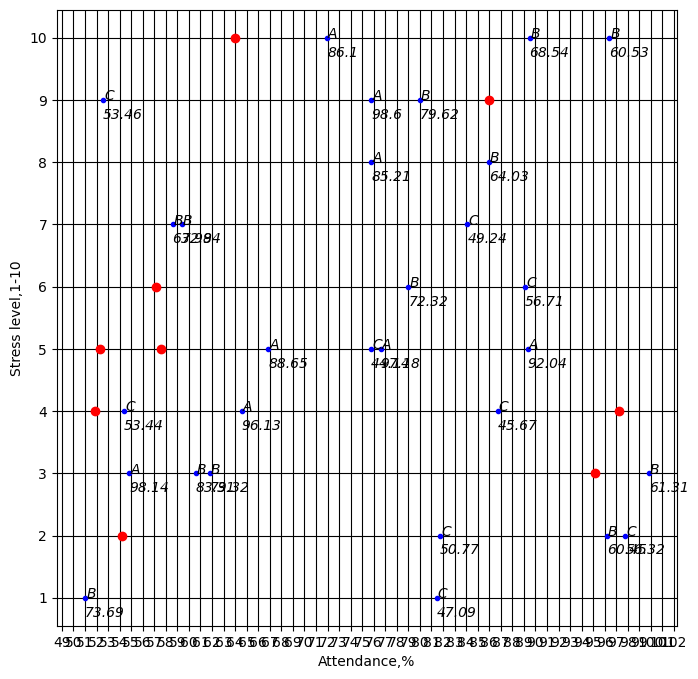

In [99]:
# визуализация выборки
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(data_train['Attendance (%)'], data_train['Stress_Level (1-10)'], 'b.', \
         data_test['Attendance (%)'], data_test['Stress_Level (1-10)'], 'ro')

# деления на осях и сетка
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.grid(which='major', color = 'k')

# подписи к осям
plt.xlabel('Attendance,%')
plt.ylabel('Stress level,1-10')
   
# подписи 
for coords in data_train[['Attendance (%)','Stress_Level (1-10)', 'Final_Score', 'y_clas']].values:
    x1, x2, y_cl, cl = coords[0], coords[1], coords[2], coords[3]
    #label = '{} ({})'.format(y_cl, cl)
    #ax.text(x1 + 0.1, x2, label, style='italic', fontsize=7)
    ax.text(x1 + 0.1, x2, cl, style='italic', fontsize=10)
    ax.text(x1, x2-0.3, y_cl, style='italic', fontsize=10)

plt.show()    

Фактически, построение модели состоит в аппроксимации функции многих переменных по известным точкам обучающей выборки. В данном примере $X_1$ и $X_2$ являются переменными. Значение функции подписано для каждой точки обучающей выборки.

Документация по выводу точек:

https://matplotlib.org/users/pyplot_tutorial.html

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

### Фаза обучения

- Особенность метода заключается в том, что фаза обучения как таковая отсутствует. При обучении необходимо только сохранить обучающую выборку $X^{train}|Y^{train}$, которая будет использоваться для выбора ближайших соседей на этапе предсказания. 

- В этом отношении k-NN очень нетипичный метод. В большинстве других методов на этапе обучения используется массивная обработка данных и построение сложной модели аппроксимации для дальнейших предсказаний.

#### Пример с регрессией

In [100]:
# создаем объект класса
simple_knn_regr = SimpleKNN()

In [101]:
# вызываем метод обучения
simple_knn_regr.fit(data_train[['Attendance (%)','Stress_Level (1-10)']], data_train['Final_Score'])

In [102]:
# параметры метода
# матрица объект-признак
simple_knn_regr._X_train

,Attendance (%),Stress_Level (1-10)
0,54.840000,3
1,61.800000,3
2,52.580000,9
3,99.810000,3
4,75.777692,9
5,54.370000,4
6,51.010000,1
7,85.960000,8
8,71.960000,10
9,89.340000,5


In [103]:
# вектор целевого признака
simple_knn_regr._y_train

0     98.14
1     79.32
2     53.46
3     61.31
4     98.60
5     53.44
6     73.69
7     64.03
8     86.10
9     92.04
10    60.45
11    79.62
12    72.94
13    56.71
14    56.32
15    72.32
16    49.24
17    88.65
18    44.14
19    45.67
20    60.53
21    47.09
22    68.54
23    63.98
24    83.31
25    97.18
26    85.21
27    50.77
28    96.13
Name: Final_Score, dtype: float64

#### Пример с классификацией

In [104]:
simple_knn_clas = SimpleKNN()
simple_knn_clas.fit(data_train[['Attendance (%)','Stress_Level (1-10)']], data_train['y_clas'])

In [105]:
simple_knn_clas._X_train

,Attendance (%),Stress_Level (1-10)
0,54.840000,3
1,61.800000,3
2,52.580000,9
3,99.810000,3
4,75.777692,9
5,54.370000,4
6,51.010000,1
7,85.960000,8
8,71.960000,10
9,89.340000,5


In [106]:
simple_knn_clas._y_train

0     A
1     B
2     C
3     B
4     A
5     C
6     B
7     B
8     A
9     A
10    B
11    B
12    B
13    C
14    C
15    B
16    C
17    A
18    C
19    C
20    B
21    C
22    B
23    B
24    B
25    A
26    A
27    C
28    A
Name: y_clas, dtype: object

### Фаза предсказания

Фаза предсказания в методе ближайших соседей достаточно проста (здесь разобран наиболее простой алгоритм):
1. Необходимо вычислить расстояние от искомой точки до всех точек обучающей выборки:
  1. Для того, чтобы вычислить расстояние, в пространстве точек необходимо ввести метрику (функцию дистанции).
  1. Наиболее часто используется Евклидова метрика. Для векторов $p$ и $q$ в n-мерном пространстве:
  $$d(p,q)= \sqrt{ (p_1-q_1)^2 + (p_2-q_2)^2 + \cdots + (p_n-q_n)^2 } = \sqrt{ \sum_{i=1}^{n} (p_i-q_i)^2} $$
  Также могут использоваться более сложные метрики https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html
  
1. Сортируем массив найденных расстояний по возрастанию.
1. Выбираем K первых элементов массива (соответствующих точкам обучающей выборки, наиболее близких к искомой), знаем $Y_{o}^{train}$ для этих точек, объединяем найденные $Y_{o}^{train}$ в массив $YK^{train}$. Таким образом, массив $YK^{train}$ - это подмножество вектора $Y^{train}$, соответствующий  K точкам обучающей выборки, наиболее близким к искомой точке.
1. Для полученого массива $YK^{train}$ необходимо вычислить регрессию или класификацию:
    - В случае регрессии берется среднее по всем значениям массива - $mean(YK^{train})$
    - В случае классификации возвращается метка класса, наиболее часто встречающегося в $YK^{train}$. То есть мы присоединяем точку к тому классу, к которому уже принадлежит больше всего соседей.
    - Существуют другие подходы к классификации, например возвращать метку класса для наиболее близкого соседа (в этом случае фактически не учитывается гиперпараметр К).
 

In [107]:
# первая строка тестовой выборки
data_test_0 = [x for x in data_test[['Attendance (%)','Stress_Level (1-10)']].iloc[0]]
data_test_0

[52.29, 5.0]


**************************************
Проверяемая точка:  [52.29, 5.0]
**************************************
Вывод отсортированного списка соседей:
X1=54.37, X2=4.0, y=53.44, расстояние=2.31
X1=54.84, X2=3.0, y=98.14, расстояние=3.24
X1=52.58, X2=9.0, y=53.46, расстояние=4.01
X1=51.01, X2=1.0, y=73.69, расстояние=4.20
X1=58.58, X2=7.0, y=63.98, расстояние=6.60
X1=59.36, X2=7.0, y=72.94, расстояние=7.35
X1=60.6, X2=3.0, y=83.31, расстояние=8.55
X1=61.8, X2=3.0, y=79.32, расстояние=9.72
X1=64.58, X2=4.0, y=96.13, расстояние=12.33
X1=66.87, X2=5.0, y=88.65, расстояние=14.58
X1=71.96, X2=10.0, y=86.1, расстояние=20.30
X1=75.7776923076923, X2=5.0, y=44.14, расстояние=23.49
X1=75.7776923076923, X2=8.0, y=85.21, расстояние=23.68
X1=75.7776923076923, X2=9.0, y=98.6, расстояние=23.83
X1=76.6, X2=5.0, y=97.18, расстояние=24.31
X1=79.01, X2=6.0, y=72.32, расстояние=26.74
X1=79.97, X2=9.0, y=79.62, расстояние=27.97
X1=81.45, X2=1.0, y=47.09, расстояние=29.43
X1=81.75, X2=2.0, y=50.77, расстояни

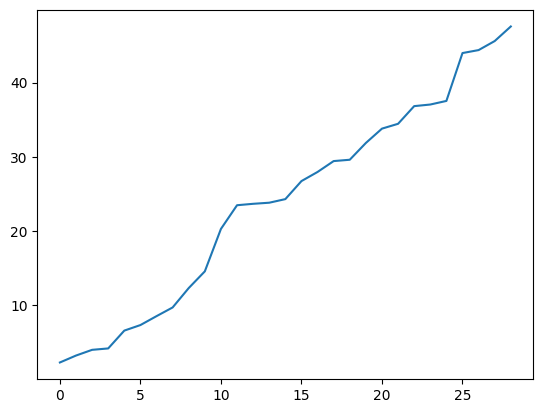

Вывод К ближайших соседей:
X1=54.37, X2=4.0, y=53.44, расстояние=2.31
X1=54.84, X2=3.0, y=98.14, расстояние=3.24
X1=52.58, X2=9.0, y=53.46, расстояние=4.01
X1=51.01, X2=1.0, y=73.69, расстояние=4.20
X1=58.58, X2=7.0, y=63.98, расстояние=6.60

Визуализация К ближайших соседей:


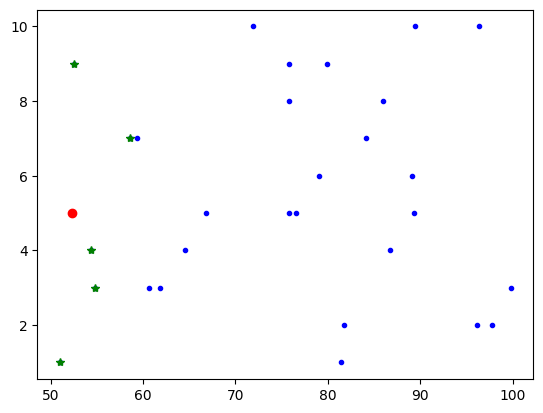

68.542

In [108]:
# построим предсказание для одного объекта (регрессия)
simple_knn_regr_0 = simple_knn_regr.predict_for_single_object(K=5, \
                          prediction_type=PredictionType.REGRESSION, \
                          X_o=data_test_0)
simple_knn_regr_0

In [109]:
# Среднее значение y для соседей
np.mean([1.9, 2.0, 1.2, 1.1, 4.0])

2.04


**************************************
Проверяемая точка:  [52.29, 5.0]
**************************************
Вывод отсортированного списка соседей:
X1=54.37, X2=4.0, y=C, расстояние=2.31
X1=54.84, X2=3.0, y=A, расстояние=3.24
X1=52.58, X2=9.0, y=C, расстояние=4.01
X1=51.01, X2=1.0, y=B, расстояние=4.20
X1=58.58, X2=7.0, y=B, расстояние=6.60
X1=59.36, X2=7.0, y=B, расстояние=7.35
X1=60.6, X2=3.0, y=B, расстояние=8.55
X1=61.8, X2=3.0, y=B, расстояние=9.72
X1=64.58, X2=4.0, y=A, расстояние=12.33
X1=66.87, X2=5.0, y=A, расстояние=14.58
X1=71.96, X2=10.0, y=A, расстояние=20.30
X1=75.7776923076923, X2=5.0, y=C, расстояние=23.49
X1=75.7776923076923, X2=8.0, y=A, расстояние=23.68
X1=75.7776923076923, X2=9.0, y=A, расстояние=23.83
X1=76.6, X2=5.0, y=A, расстояние=24.31
X1=79.01, X2=6.0, y=B, расстояние=26.74
X1=79.97, X2=9.0, y=B, расстояние=27.97
X1=81.45, X2=1.0, y=C, расстояние=29.43
X1=81.75, X2=2.0, y=C, расстояние=29.61
X1=84.1, X2=7.0, y=C, расстояние=31.87
X1=85.96, X2=8.0, y=B, расс

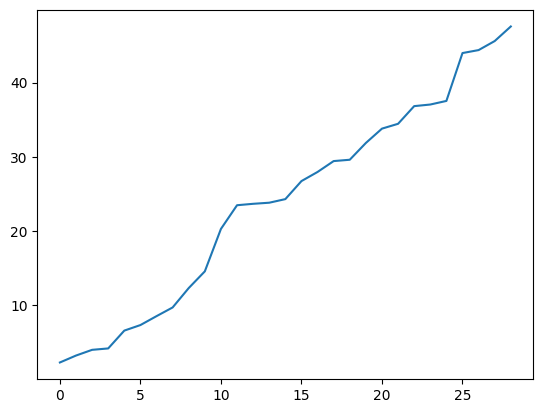

Вывод К ближайших соседей:
X1=54.37, X2=4.0, y=C, расстояние=2.31
X1=54.84, X2=3.0, y=A, расстояние=3.24
X1=52.58, X2=9.0, y=C, расстояние=4.01
X1=51.01, X2=1.0, y=B, расстояние=4.20
X1=58.58, X2=7.0, y=B, расстояние=6.60

Визуализация К ближайших соседей:


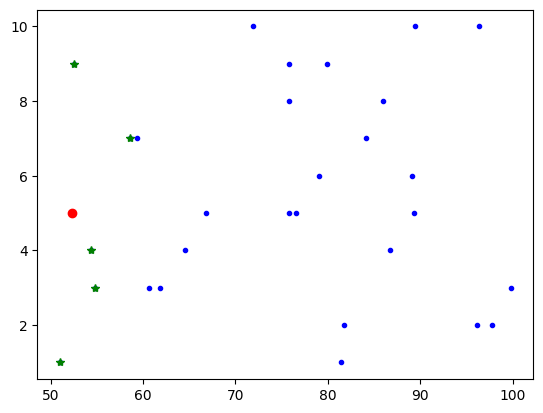

Классы, соответствующие К ближайшим соседям:
класс=B, количество элементов=2
класс=C, количество элементов=2
класс=A, количество элементов=1


'B'

In [110]:
# построим предсказание для одного объекта (классификация)
simple_knn_clas_0 = simple_knn_clas.predict_for_single_object(K=5, \
                          prediction_type=PredictionType.CLASSIFICATION, \
                          X_o=data_test_0)
simple_knn_clas_0


**************************************
Проверяемая точка:  [52.29, 5.0]
**************************************
Вывод отсортированного списка соседей:
X1=54.37, X2=4.0, y=53.44, расстояние=2.31
X1=54.84, X2=3.0, y=98.14, расстояние=3.24
X1=52.58, X2=9.0, y=53.46, расстояние=4.01
X1=51.01, X2=1.0, y=73.69, расстояние=4.20
X1=58.58, X2=7.0, y=63.98, расстояние=6.60
X1=59.36, X2=7.0, y=72.94, расстояние=7.35
X1=60.6, X2=3.0, y=83.31, расстояние=8.55
X1=61.8, X2=3.0, y=79.32, расстояние=9.72
X1=64.58, X2=4.0, y=96.13, расстояние=12.33
X1=66.87, X2=5.0, y=88.65, расстояние=14.58
X1=71.96, X2=10.0, y=86.1, расстояние=20.30
X1=75.7776923076923, X2=5.0, y=44.14, расстояние=23.49
X1=75.7776923076923, X2=8.0, y=85.21, расстояние=23.68
X1=75.7776923076923, X2=9.0, y=98.6, расстояние=23.83
X1=76.6, X2=5.0, y=97.18, расстояние=24.31
X1=79.01, X2=6.0, y=72.32, расстояние=26.74
X1=79.97, X2=9.0, y=79.62, расстояние=27.97
X1=81.45, X2=1.0, y=47.09, расстояние=29.43
X1=81.75, X2=2.0, y=50.77, расстояни

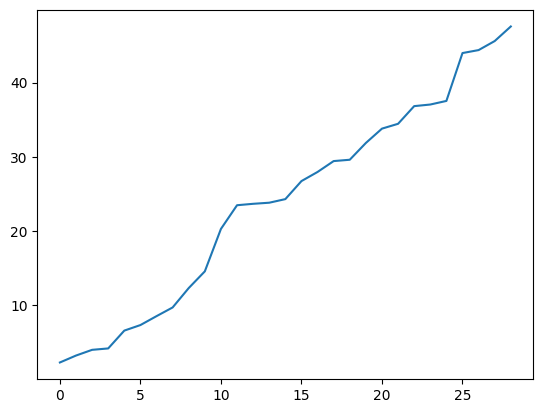

Вывод К ближайших соседей:
X1=54.37, X2=4.0, y=53.44, расстояние=2.31
X1=54.84, X2=3.0, y=98.14, расстояние=3.24
X1=52.58, X2=9.0, y=53.46, расстояние=4.01
X1=51.01, X2=1.0, y=73.69, расстояние=4.20
X1=58.58, X2=7.0, y=63.98, расстояние=6.60

Визуализация К ближайших соседей:


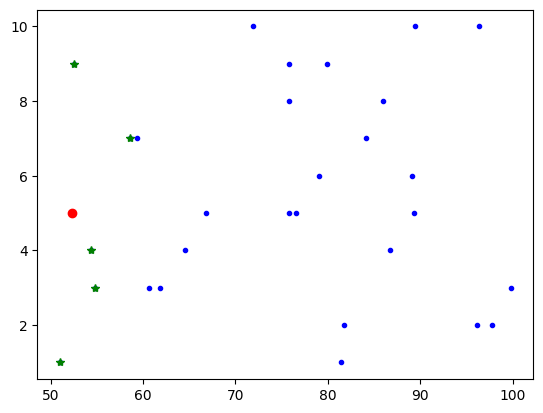


**************************************
Проверяемая точка:  [97.27, 4.0]
**************************************
Вывод отсортированного списка соседей:
X1=97.79, X2=2.0, y=56.32, расстояние=2.07
X1=96.17, X2=2.0, y=60.45, расстояние=2.28
X1=99.81, X2=3.0, y=61.31, расстояние=2.73
X1=96.39, X2=10.0, y=60.53, расстояние=6.06
X1=89.34, X2=5.0, y=92.04, расстояние=7.99
X1=89.11, X2=6.0, y=56.71, расстояние=8.40
X1=89.49, X2=10.0, y=68.54, расстояние=9.82
X1=86.73, X2=4.0, y=45.67, расстояние=10.54
X1=85.96, X2=8.0, y=64.03, расстояние=12.00
X1=84.1, X2=7.0, y=49.24, расстояние=13.51
X1=81.75, X2=2.0, y=50.77, расстояние=15.65
X1=81.45, X2=1.0, y=47.09, расстояние=16.10
X1=79.97, X2=9.0, y=79.62, расстояние=18.01
X1=79.01, X2=6.0, y=72.32, расстояние=18.37
X1=76.6, X2=5.0, y=97.18, расстояние=20.69
X1=75.7776923076923, X2=5.0, y=44.14, расстояние=21.52
X1=75.7776923076923, X2=8.0, y=85.21, расстояние=21.86
X1=75.7776923076923, X2=9.0, y=98.6, расстояние=22.07
X1=71.96, X2=10.0, y=86.1, расст

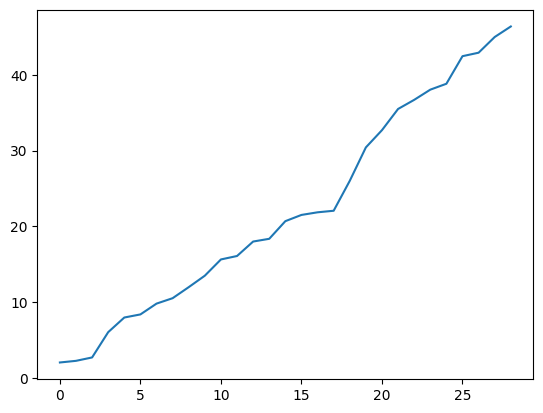

Вывод К ближайших соседей:
X1=97.79, X2=2.0, y=56.32, расстояние=2.07
X1=96.17, X2=2.0, y=60.45, расстояние=2.28
X1=99.81, X2=3.0, y=61.31, расстояние=2.73
X1=96.39, X2=10.0, y=60.53, расстояние=6.06
X1=89.34, X2=5.0, y=92.04, расстояние=7.99

Визуализация К ближайших соседей:


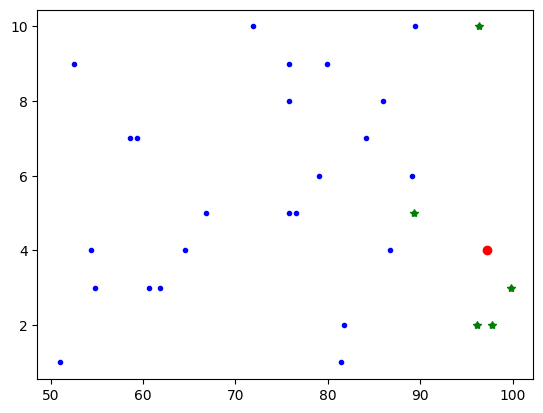


**************************************
Проверяемая точка:  [57.19, 6.0]
**************************************
Вывод отсортированного списка соседей:
X1=58.58, X2=7.0, y=63.98, расстояние=1.71
X1=59.36, X2=7.0, y=72.94, расстояние=2.39
X1=54.37, X2=4.0, y=53.44, расстояние=3.46
X1=54.84, X2=3.0, y=98.14, расстояние=3.81
X1=60.6, X2=3.0, y=83.31, расстояние=4.54
X1=61.8, X2=3.0, y=79.32, расстояние=5.50
X1=52.58, X2=9.0, y=53.46, расстояние=5.50
X1=64.58, X2=4.0, y=96.13, расстояние=7.66
X1=51.01, X2=1.0, y=73.69, расстояние=7.95
X1=66.87, X2=5.0, y=88.65, расстояние=9.73
X1=71.96, X2=10.0, y=86.1, расстояние=15.30
X1=75.7776923076923, X2=5.0, y=44.14, расстояние=18.61
X1=75.7776923076923, X2=8.0, y=85.21, расстояние=18.69
X1=75.7776923076923, X2=9.0, y=98.6, расстояние=18.83
X1=76.6, X2=5.0, y=97.18, расстояние=19.44
X1=79.01, X2=6.0, y=72.32, расстояние=21.82
X1=79.97, X2=9.0, y=79.62, расстояние=22.98
X1=81.45, X2=1.0, y=47.09, расстояние=24.77
X1=81.75, X2=2.0, y=50.77, расстояние=

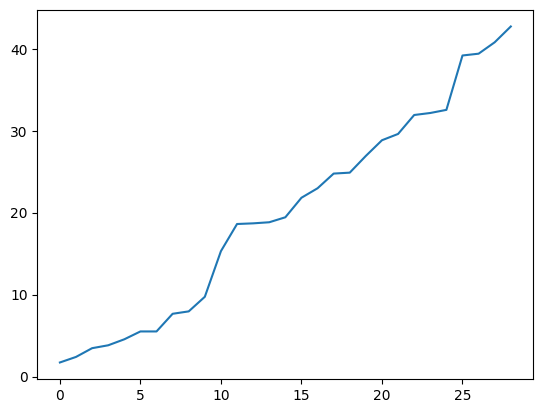

Вывод К ближайших соседей:
X1=58.58, X2=7.0, y=63.98, расстояние=1.71
X1=59.36, X2=7.0, y=72.94, расстояние=2.39
X1=54.37, X2=4.0, y=53.44, расстояние=3.46
X1=54.84, X2=3.0, y=98.14, расстояние=3.81
X1=60.6, X2=3.0, y=83.31, расстояние=4.54

Визуализация К ближайших соседей:


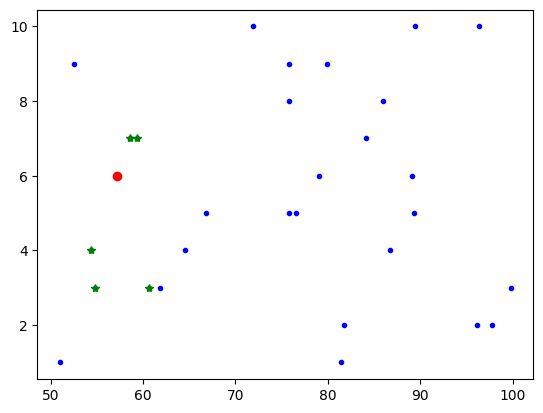


**************************************
Проверяемая точка:  [95.15, 3.0]
**************************************
Вывод отсортированного списка соседей:
X1=96.17, X2=2.0, y=60.45, расстояние=1.43
X1=97.79, X2=2.0, y=56.32, расстояние=2.82
X1=99.81, X2=3.0, y=61.31, расстояние=4.66
X1=89.34, X2=5.0, y=92.04, расстояние=6.14
X1=89.11, X2=6.0, y=56.71, расстояние=6.74
X1=96.39, X2=10.0, y=60.53, расстояние=7.11
X1=86.73, X2=4.0, y=45.67, расстояние=8.48
X1=89.49, X2=10.0, y=68.54, расстояние=9.00
X1=85.96, X2=8.0, y=64.03, расстояние=10.46
X1=84.1, X2=7.0, y=49.24, расстояние=11.75
X1=81.75, X2=2.0, y=50.77, расстояние=13.44
X1=81.45, X2=1.0, y=47.09, расстояние=13.85
X1=79.97, X2=9.0, y=79.62, расстояние=16.32
X1=79.01, X2=6.0, y=72.32, расстояние=16.42
X1=76.6, X2=5.0, y=97.18, расстояние=18.66
X1=75.7776923076923, X2=5.0, y=44.14, расстояние=19.48
X1=75.7776923076923, X2=8.0, y=85.21, расстояние=20.01
X1=75.7776923076923, X2=9.0, y=98.6, расстояние=20.28
X1=71.96, X2=10.0, y=86.1, рассто

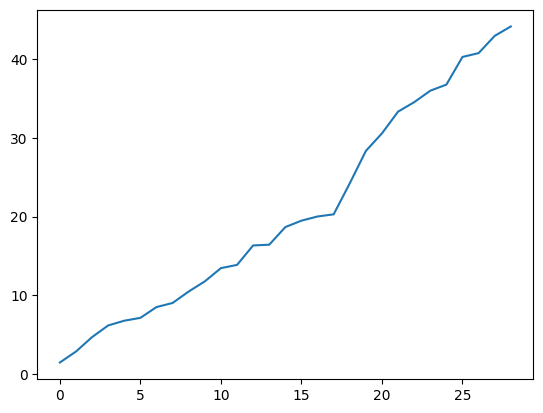

Вывод К ближайших соседей:
X1=96.17, X2=2.0, y=60.45, расстояние=1.43
X1=97.79, X2=2.0, y=56.32, расстояние=2.82
X1=99.81, X2=3.0, y=61.31, расстояние=4.66
X1=89.34, X2=5.0, y=92.04, расстояние=6.14
X1=89.11, X2=6.0, y=56.71, расстояние=6.74

Визуализация К ближайших соседей:


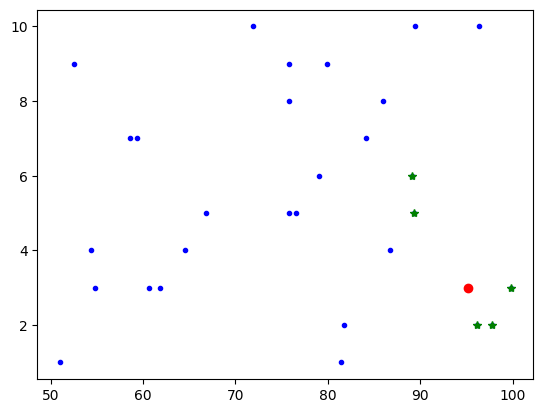


**************************************
Проверяемая точка:  [54.18, 2.0]
**************************************
Вывод отсортированного списка соседей:
X1=54.84, X2=3.0, y=98.14, расстояние=1.20
X1=54.37, X2=4.0, y=53.44, расстояние=2.01
X1=51.01, X2=1.0, y=73.69, расстояние=3.32
X1=60.6, X2=3.0, y=83.31, расстояние=6.50
X1=58.58, X2=7.0, y=63.98, расстояние=6.66
X1=52.58, X2=9.0, y=53.46, расстояние=7.18
X1=59.36, X2=7.0, y=72.94, расстояние=7.20
X1=61.8, X2=3.0, y=79.32, расстояние=7.69
X1=64.58, X2=4.0, y=96.13, расстояние=10.59
X1=66.87, X2=5.0, y=88.65, расстояние=13.04
X1=71.96, X2=10.0, y=86.1, расстояние=19.50
X1=75.7776923076923, X2=5.0, y=44.14, расстояние=21.81
X1=75.7776923076923, X2=8.0, y=85.21, расстояние=22.42
X1=76.6, X2=5.0, y=97.18, расстояние=22.62
X1=75.7776923076923, X2=9.0, y=98.6, расстояние=22.70
X1=79.01, X2=6.0, y=72.32, расстояние=25.15
X1=79.97, X2=9.0, y=79.62, расстояние=26.72
X1=81.45, X2=1.0, y=47.09, расстояние=27.29
X1=81.75, X2=2.0, y=50.77, расстояни

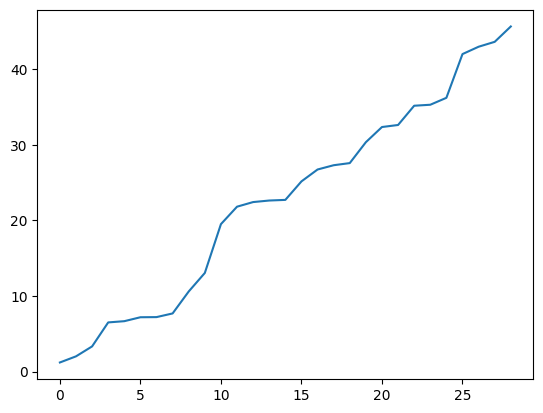

Вывод К ближайших соседей:
X1=54.84, X2=3.0, y=98.14, расстояние=1.20
X1=54.37, X2=4.0, y=53.44, расстояние=2.01
X1=51.01, X2=1.0, y=73.69, расстояние=3.32
X1=60.6, X2=3.0, y=83.31, расстояние=6.50
X1=58.58, X2=7.0, y=63.98, расстояние=6.66

Визуализация К ближайших соседей:


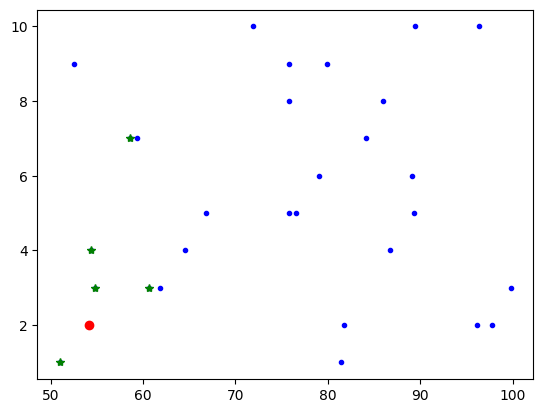


**************************************
Проверяемая точка:  [nan, 1.0]
**************************************
Вывод отсортированного списка соседей:
X1=54.84, X2=3.0, y=98.14, расстояние=nan
X1=61.8, X2=3.0, y=79.32, расстояние=nan
X1=52.58, X2=9.0, y=53.46, расстояние=nan
X1=99.81, X2=3.0, y=61.31, расстояние=nan
X1=75.7776923076923, X2=9.0, y=98.6, расстояние=nan
X1=54.37, X2=4.0, y=53.44, расстояние=nan
X1=51.01, X2=1.0, y=73.69, расстояние=nan
X1=85.96, X2=8.0, y=64.03, расстояние=nan
X1=71.96, X2=10.0, y=86.1, расстояние=nan
X1=89.34, X2=5.0, y=92.04, расстояние=nan
X1=96.17, X2=2.0, y=60.45, расстояние=nan
X1=79.97, X2=9.0, y=79.62, расстояние=nan
X1=59.36, X2=7.0, y=72.94, расстояние=nan
X1=89.11, X2=6.0, y=56.71, расстояние=nan
X1=97.79, X2=2.0, y=56.32, расстояние=nan
X1=79.01, X2=6.0, y=72.32, расстояние=nan
X1=84.1, X2=7.0, y=49.24, расстояние=nan
X1=66.87, X2=5.0, y=88.65, расстояние=nan
X1=75.7776923076923, X2=5.0, y=44.14, расстояние=nan
X1=86.73, X2=4.0, y=45.67, расстоя

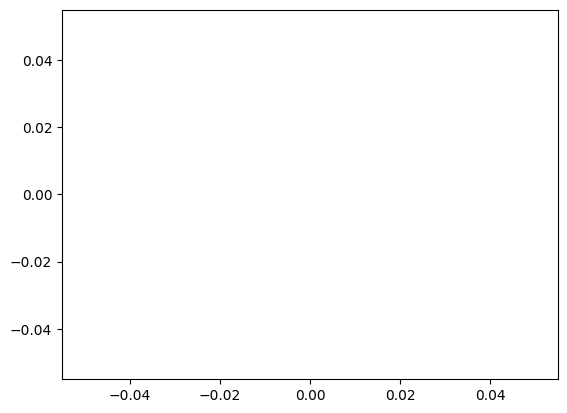

Вывод К ближайших соседей:
X1=54.84, X2=3.0, y=98.14, расстояние=nan
X1=61.8, X2=3.0, y=79.32, расстояние=nan
X1=52.58, X2=9.0, y=53.46, расстояние=nan
X1=99.81, X2=3.0, y=61.31, расстояние=nan
X1=75.7776923076923, X2=9.0, y=98.6, расстояние=nan

Визуализация К ближайших соседей:


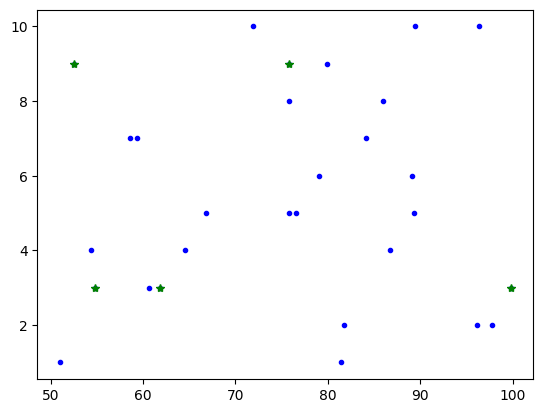


**************************************
Проверяемая точка:  [57.6, 5.0]
**************************************
Вывод отсортированного списка соседей:
X1=58.58, X2=7.0, y=63.98, расстояние=2.23
X1=59.36, X2=7.0, y=72.94, расстояние=2.66
X1=54.37, X2=4.0, y=53.44, расстояние=3.38
X1=54.84, X2=3.0, y=98.14, расстояние=3.41
X1=60.6, X2=3.0, y=83.31, расстояние=3.61
X1=61.8, X2=3.0, y=79.32, расстояние=4.65
X1=52.58, X2=9.0, y=53.46, расстояние=6.42
X1=64.58, X2=4.0, y=96.13, расстояние=7.05
X1=51.01, X2=1.0, y=73.69, расстояние=7.71
X1=66.87, X2=5.0, y=88.65, расстояние=9.27
X1=71.96, X2=10.0, y=86.1, расстояние=15.21
X1=75.7776923076923, X2=5.0, y=44.14, расстояние=18.18
X1=75.7776923076923, X2=8.0, y=85.21, расстояние=18.42
X1=75.7776923076923, X2=9.0, y=98.6, расстояние=18.61
X1=76.6, X2=5.0, y=97.18, расстояние=19.00
X1=79.01, X2=6.0, y=72.32, расстояние=21.43
X1=79.97, X2=9.0, y=79.62, расстояние=22.72
X1=81.45, X2=1.0, y=47.09, расстояние=24.18
X1=81.75, X2=2.0, y=50.77, расстояние=2

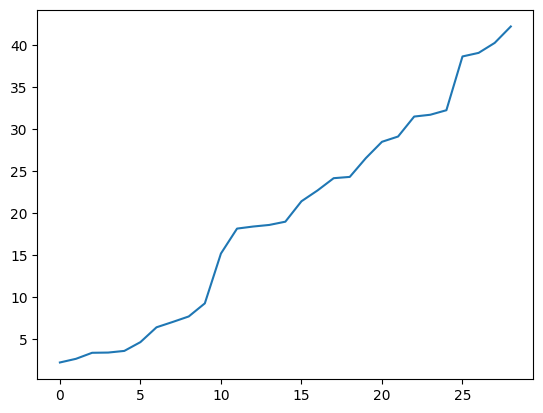

Вывод К ближайших соседей:
X1=58.58, X2=7.0, y=63.98, расстояние=2.23
X1=59.36, X2=7.0, y=72.94, расстояние=2.66
X1=54.37, X2=4.0, y=53.44, расстояние=3.38
X1=54.84, X2=3.0, y=98.14, расстояние=3.41
X1=60.6, X2=3.0, y=83.31, расстояние=3.61

Визуализация К ближайших соседей:


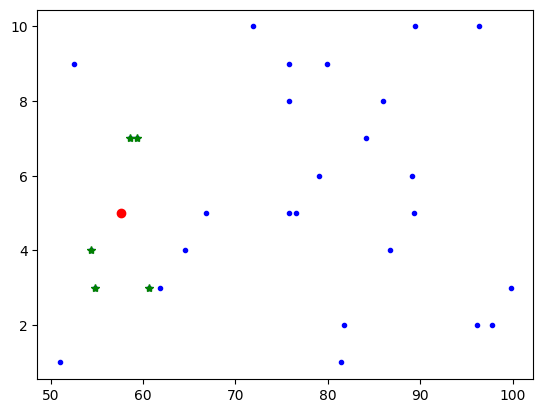


**************************************
Проверяемая точка:  [51.91, 4.0]
**************************************
Вывод отсортированного списка соседей:
X1=54.37, X2=4.0, y=53.44, расстояние=2.46
X1=54.84, X2=3.0, y=98.14, расстояние=3.10
X1=51.01, X2=1.0, y=73.69, расстояние=3.13
X1=52.58, X2=9.0, y=53.46, расстояние=5.04
X1=58.58, X2=7.0, y=63.98, расстояние=7.31
X1=59.36, X2=7.0, y=72.94, расстояние=8.03
X1=60.6, X2=3.0, y=83.31, расстояние=8.75
X1=61.8, X2=3.0, y=79.32, расстояние=9.94
X1=64.58, X2=4.0, y=96.13, расстояние=12.67
X1=66.87, X2=5.0, y=88.65, расстояние=14.99
X1=71.96, X2=10.0, y=86.1, расстояние=20.93
X1=75.7776923076923, X2=5.0, y=44.14, расстояние=23.89
X1=75.7776923076923, X2=8.0, y=85.21, расстояние=24.20
X1=75.7776923076923, X2=9.0, y=98.6, расстояние=24.39
X1=76.6, X2=5.0, y=97.18, расстояние=24.71
X1=79.01, X2=6.0, y=72.32, расстояние=27.17
X1=79.97, X2=9.0, y=79.62, расстояние=28.50
X1=81.45, X2=1.0, y=47.09, расстояние=29.69
X1=81.75, X2=2.0, y=50.77, расстояни

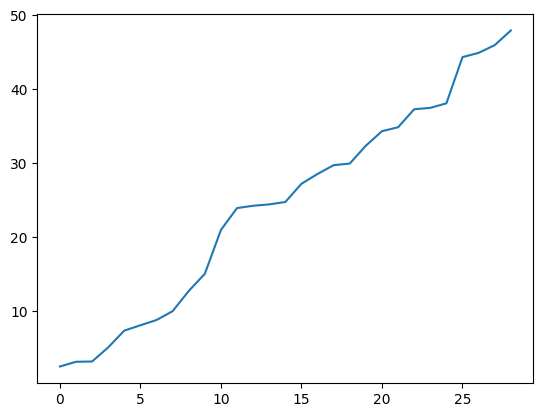

Вывод К ближайших соседей:
X1=54.37, X2=4.0, y=53.44, расстояние=2.46
X1=54.84, X2=3.0, y=98.14, расстояние=3.10
X1=51.01, X2=1.0, y=73.69, расстояние=3.13
X1=52.58, X2=9.0, y=53.46, расстояние=5.04
X1=58.58, X2=7.0, y=63.98, расстояние=7.31

Визуализация К ближайших соседей:


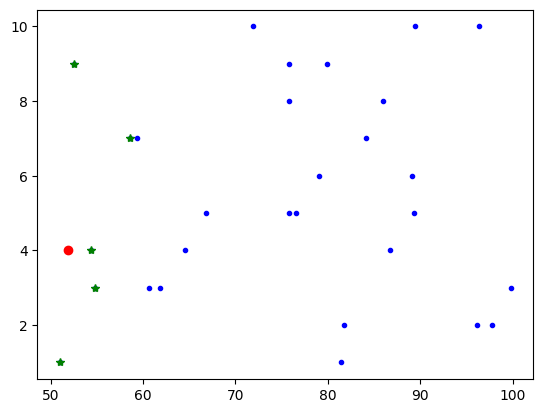


**************************************
Проверяемая точка:  [85.97, 9.0]
**************************************
Вывод отсортированного списка соседей:
X1=85.96, X2=8.0, y=64.03, расстояние=1.00
X1=84.1, X2=7.0, y=49.24, расстояние=2.74
X1=89.49, X2=10.0, y=68.54, расстояние=3.66
X1=89.11, X2=6.0, y=56.71, расстояние=4.34
X1=86.73, X2=4.0, y=45.67, расстояние=5.06
X1=89.34, X2=5.0, y=92.04, расстояние=5.23
X1=79.97, X2=9.0, y=79.62, расстояние=6.00
X1=79.01, X2=6.0, y=72.32, расстояние=7.58
X1=81.75, X2=2.0, y=50.77, расстояние=8.17
X1=81.45, X2=1.0, y=47.09, расстояние=9.19
X1=76.6, X2=5.0, y=97.18, расстояние=10.19
X1=75.7776923076923, X2=9.0, y=98.6, расстояние=10.19
X1=75.7776923076923, X2=8.0, y=85.21, расстояние=10.24
X1=96.39, X2=10.0, y=60.53, расстояние=10.47
X1=75.7776923076923, X2=5.0, y=44.14, расстояние=10.95
X1=96.17, X2=2.0, y=60.45, расстояние=12.37
X1=97.79, X2=2.0, y=56.32, расстояние=13.74
X1=71.96, X2=10.0, y=86.1, расстояние=14.05
X1=99.81, X2=3.0, y=61.31, расстоян

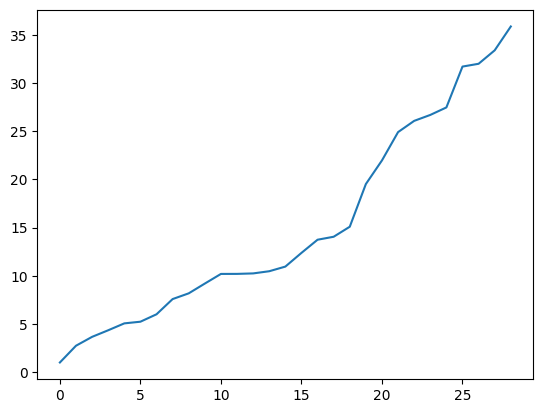

Вывод К ближайших соседей:
X1=85.96, X2=8.0, y=64.03, расстояние=1.00
X1=84.1, X2=7.0, y=49.24, расстояние=2.74
X1=89.49, X2=10.0, y=68.54, расстояние=3.66
X1=89.11, X2=6.0, y=56.71, расстояние=4.34
X1=86.73, X2=4.0, y=45.67, расстояние=5.06

Визуализация К ближайших соседей:


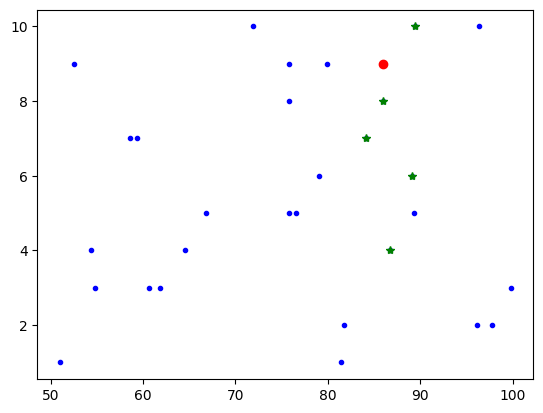


**************************************
Проверяемая точка:  [64.01, 10.0]
**************************************
Вывод отсортированного списка соседей:
X1=59.36, X2=7.0, y=72.94, расстояние=5.53
X1=66.87, X2=5.0, y=88.65, расстояние=5.76
X1=64.58, X2=4.0, y=96.13, расстояние=6.03
X1=58.58, X2=7.0, y=63.98, расстояние=6.20
X1=61.8, X2=3.0, y=79.32, расстояние=7.34
X1=60.6, X2=3.0, y=83.31, расстояние=7.79
X1=71.96, X2=10.0, y=86.1, расстояние=7.95
X1=54.37, X2=4.0, y=53.44, расстояние=11.35
X1=52.58, X2=9.0, y=53.46, расстояние=11.47
X1=54.84, X2=3.0, y=98.14, расстояние=11.54
X1=75.7776923076923, X2=9.0, y=98.6, расстояние=11.81
X1=75.7776923076923, X2=8.0, y=85.21, расстояние=11.94
X1=75.7776923076923, X2=5.0, y=44.14, расстояние=12.79
X1=76.6, X2=5.0, y=97.18, расстояние=13.55
X1=79.01, X2=6.0, y=72.32, расстояние=15.52
X1=51.01, X2=1.0, y=73.69, расстояние=15.81
X1=79.97, X2=9.0, y=79.62, расстояние=15.99
X1=81.75, X2=2.0, y=50.77, расстояние=19.46
X1=81.45, X2=1.0, y=47.09, расстоя

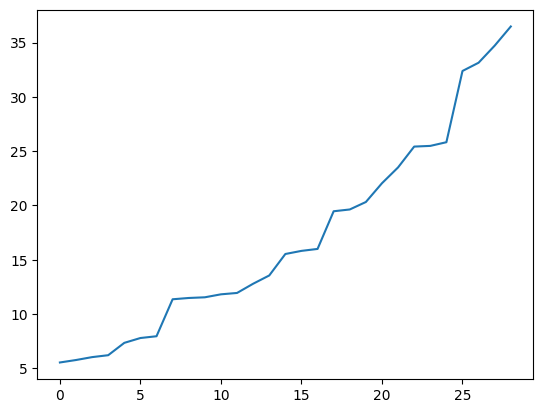

Вывод К ближайших соседей:
X1=59.36, X2=7.0, y=72.94, расстояние=5.53
X1=66.87, X2=5.0, y=88.65, расстояние=5.76
X1=64.58, X2=4.0, y=96.13, расстояние=6.03
X1=58.58, X2=7.0, y=63.98, расстояние=6.20
X1=61.8, X2=3.0, y=79.32, расстояние=7.34

Визуализация К ближайших соседей:


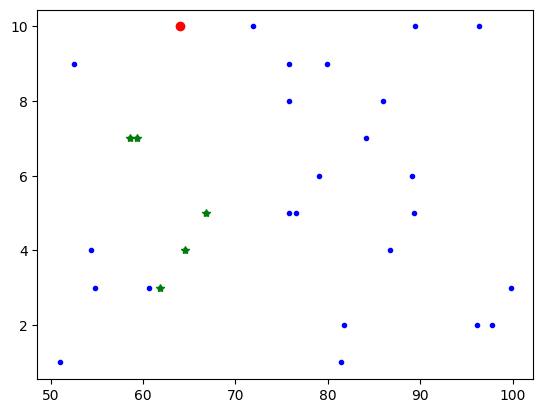

[68.542,
 66.13000000000001,
 74.362,
 65.366,
 74.512,
 78.16600000000001,
 74.362,
 68.542,
 56.838,
 80.20400000000001]

In [111]:
# Для всех объектов тестовой выборки (регрессия)
simple_knn_regr_prediction = simple_knn_regr.predict(K=5, \
                          prediction_type=PredictionType.REGRESSION, \
                          X_test=data_test[['Attendance (%)','Stress_Level (1-10)']])
simple_knn_regr_prediction


**************************************
Проверяемая точка:  [52.29, 5.0]
**************************************
Вывод отсортированного списка соседей:
X1=54.37, X2=4.0, y=C, расстояние=2.31
X1=54.84, X2=3.0, y=A, расстояние=3.24
X1=52.58, X2=9.0, y=C, расстояние=4.01
X1=51.01, X2=1.0, y=B, расстояние=4.20
X1=58.58, X2=7.0, y=B, расстояние=6.60
X1=59.36, X2=7.0, y=B, расстояние=7.35
X1=60.6, X2=3.0, y=B, расстояние=8.55
X1=61.8, X2=3.0, y=B, расстояние=9.72
X1=64.58, X2=4.0, y=A, расстояние=12.33
X1=66.87, X2=5.0, y=A, расстояние=14.58
X1=71.96, X2=10.0, y=A, расстояние=20.30
X1=75.7776923076923, X2=5.0, y=C, расстояние=23.49
X1=75.7776923076923, X2=8.0, y=A, расстояние=23.68
X1=75.7776923076923, X2=9.0, y=A, расстояние=23.83
X1=76.6, X2=5.0, y=A, расстояние=24.31
X1=79.01, X2=6.0, y=B, расстояние=26.74
X1=79.97, X2=9.0, y=B, расстояние=27.97
X1=81.45, X2=1.0, y=C, расстояние=29.43
X1=81.75, X2=2.0, y=C, расстояние=29.61
X1=84.1, X2=7.0, y=C, расстояние=31.87
X1=85.96, X2=8.0, y=B, расс

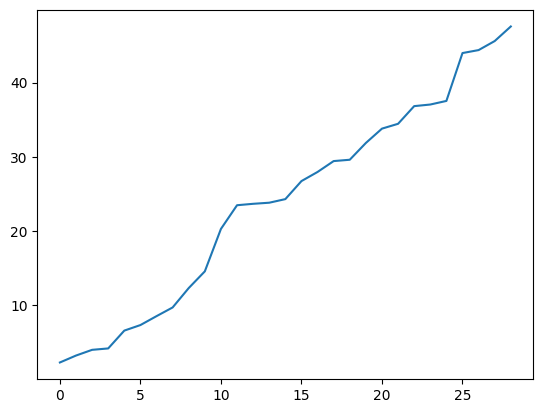

Вывод К ближайших соседей:
X1=54.37, X2=4.0, y=C, расстояние=2.31
X1=54.84, X2=3.0, y=A, расстояние=3.24
X1=52.58, X2=9.0, y=C, расстояние=4.01

Визуализация К ближайших соседей:


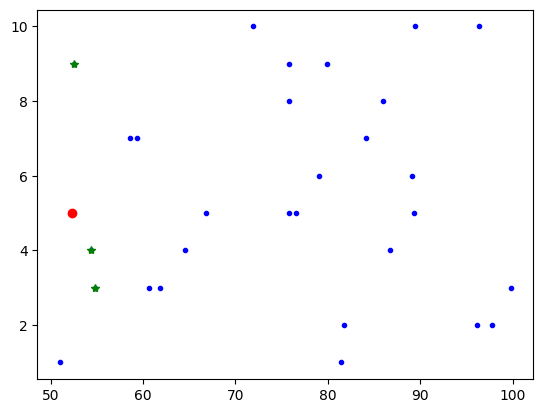

Классы, соответствующие К ближайшим соседям:
класс=C, количество элементов=2
класс=A, количество элементов=1

**************************************
Проверяемая точка:  [97.27, 4.0]
**************************************
Вывод отсортированного списка соседей:
X1=97.79, X2=2.0, y=C, расстояние=2.07
X1=96.17, X2=2.0, y=B, расстояние=2.28
X1=99.81, X2=3.0, y=B, расстояние=2.73
X1=96.39, X2=10.0, y=B, расстояние=6.06
X1=89.34, X2=5.0, y=A, расстояние=7.99
X1=89.11, X2=6.0, y=C, расстояние=8.40
X1=89.49, X2=10.0, y=B, расстояние=9.82
X1=86.73, X2=4.0, y=C, расстояние=10.54
X1=85.96, X2=8.0, y=B, расстояние=12.00
X1=84.1, X2=7.0, y=C, расстояние=13.51
X1=81.75, X2=2.0, y=C, расстояние=15.65
X1=81.45, X2=1.0, y=C, расстояние=16.10
X1=79.97, X2=9.0, y=B, расстояние=18.01
X1=79.01, X2=6.0, y=B, расстояние=18.37
X1=76.6, X2=5.0, y=A, расстояние=20.69
X1=75.7776923076923, X2=5.0, y=C, расстояние=21.52
X1=75.7776923076923, X2=8.0, y=A, расстояние=21.86
X1=75.7776923076923, X2=9.0, y=A, расстояние=

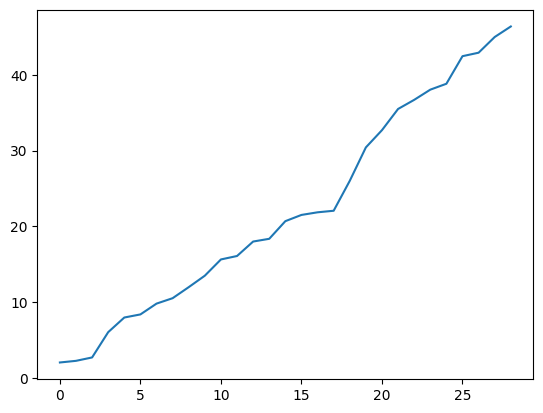

Вывод К ближайших соседей:
X1=97.79, X2=2.0, y=C, расстояние=2.07
X1=96.17, X2=2.0, y=B, расстояние=2.28
X1=99.81, X2=3.0, y=B, расстояние=2.73

Визуализация К ближайших соседей:


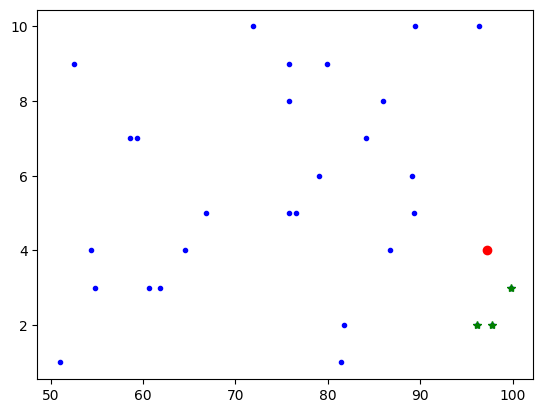

Классы, соответствующие К ближайшим соседям:
класс=B, количество элементов=2
класс=C, количество элементов=1

**************************************
Проверяемая точка:  [57.19, 6.0]
**************************************
Вывод отсортированного списка соседей:
X1=58.58, X2=7.0, y=B, расстояние=1.71
X1=59.36, X2=7.0, y=B, расстояние=2.39
X1=54.37, X2=4.0, y=C, расстояние=3.46
X1=54.84, X2=3.0, y=A, расстояние=3.81
X1=60.6, X2=3.0, y=B, расстояние=4.54
X1=61.8, X2=3.0, y=B, расстояние=5.50
X1=52.58, X2=9.0, y=C, расстояние=5.50
X1=64.58, X2=4.0, y=A, расстояние=7.66
X1=51.01, X2=1.0, y=B, расстояние=7.95
X1=66.87, X2=5.0, y=A, расстояние=9.73
X1=71.96, X2=10.0, y=A, расстояние=15.30
X1=75.7776923076923, X2=5.0, y=C, расстояние=18.61
X1=75.7776923076923, X2=8.0, y=A, расстояние=18.69
X1=75.7776923076923, X2=9.0, y=A, расстояние=18.83
X1=76.6, X2=5.0, y=A, расстояние=19.44
X1=79.01, X2=6.0, y=B, расстояние=21.82
X1=79.97, X2=9.0, y=B, расстояние=22.98
X1=81.45, X2=1.0, y=C, расстояние=24.77

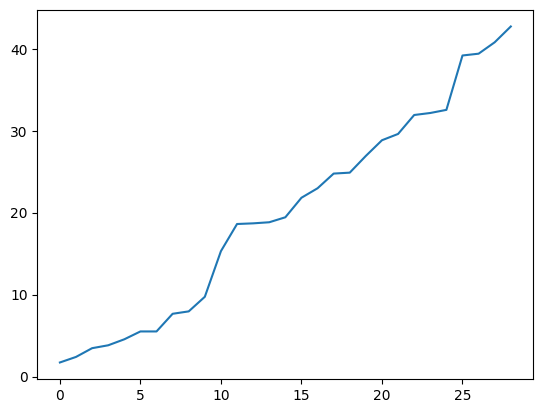

Вывод К ближайших соседей:
X1=58.58, X2=7.0, y=B, расстояние=1.71
X1=59.36, X2=7.0, y=B, расстояние=2.39
X1=54.37, X2=4.0, y=C, расстояние=3.46

Визуализация К ближайших соседей:


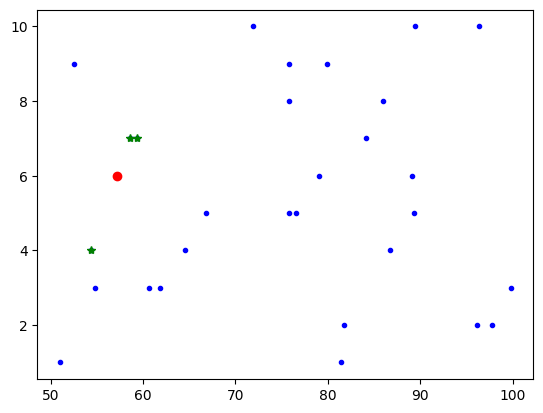

Классы, соответствующие К ближайшим соседям:
класс=B, количество элементов=2
класс=C, количество элементов=1

**************************************
Проверяемая точка:  [95.15, 3.0]
**************************************
Вывод отсортированного списка соседей:
X1=96.17, X2=2.0, y=B, расстояние=1.43
X1=97.79, X2=2.0, y=C, расстояние=2.82
X1=99.81, X2=3.0, y=B, расстояние=4.66
X1=89.34, X2=5.0, y=A, расстояние=6.14
X1=89.11, X2=6.0, y=C, расстояние=6.74
X1=96.39, X2=10.0, y=B, расстояние=7.11
X1=86.73, X2=4.0, y=C, расстояние=8.48
X1=89.49, X2=10.0, y=B, расстояние=9.00
X1=85.96, X2=8.0, y=B, расстояние=10.46
X1=84.1, X2=7.0, y=C, расстояние=11.75
X1=81.75, X2=2.0, y=C, расстояние=13.44
X1=81.45, X2=1.0, y=C, расстояние=13.85
X1=79.97, X2=9.0, y=B, расстояние=16.32
X1=79.01, X2=6.0, y=B, расстояние=16.42
X1=76.6, X2=5.0, y=A, расстояние=18.66
X1=75.7776923076923, X2=5.0, y=C, расстояние=19.48
X1=75.7776923076923, X2=8.0, y=A, расстояние=20.01
X1=75.7776923076923, X2=9.0, y=A, расстояние=2

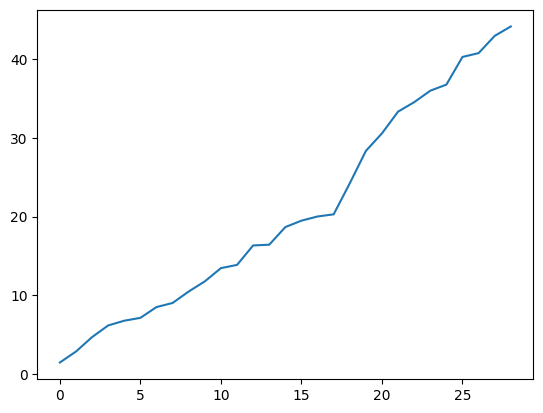

Вывод К ближайших соседей:
X1=96.17, X2=2.0, y=B, расстояние=1.43
X1=97.79, X2=2.0, y=C, расстояние=2.82
X1=99.81, X2=3.0, y=B, расстояние=4.66

Визуализация К ближайших соседей:


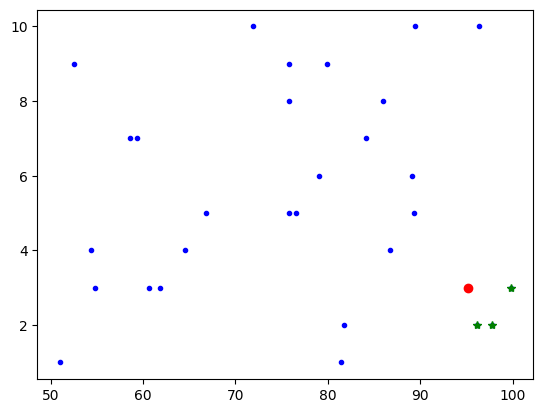

Классы, соответствующие К ближайшим соседям:
класс=B, количество элементов=2
класс=C, количество элементов=1

**************************************
Проверяемая точка:  [54.18, 2.0]
**************************************
Вывод отсортированного списка соседей:
X1=54.84, X2=3.0, y=A, расстояние=1.20
X1=54.37, X2=4.0, y=C, расстояние=2.01
X1=51.01, X2=1.0, y=B, расстояние=3.32
X1=60.6, X2=3.0, y=B, расстояние=6.50
X1=58.58, X2=7.0, y=B, расстояние=6.66
X1=52.58, X2=9.0, y=C, расстояние=7.18
X1=59.36, X2=7.0, y=B, расстояние=7.20
X1=61.8, X2=3.0, y=B, расстояние=7.69
X1=64.58, X2=4.0, y=A, расстояние=10.59
X1=66.87, X2=5.0, y=A, расстояние=13.04
X1=71.96, X2=10.0, y=A, расстояние=19.50
X1=75.7776923076923, X2=5.0, y=C, расстояние=21.81
X1=75.7776923076923, X2=8.0, y=A, расстояние=22.42
X1=76.6, X2=5.0, y=A, расстояние=22.62
X1=75.7776923076923, X2=9.0, y=A, расстояние=22.70
X1=79.01, X2=6.0, y=B, расстояние=25.15
X1=79.97, X2=9.0, y=B, расстояние=26.72
X1=81.45, X2=1.0, y=C, расстояние=27.

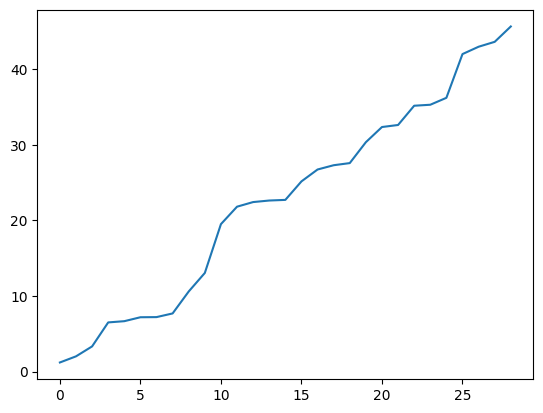

Вывод К ближайших соседей:
X1=54.84, X2=3.0, y=A, расстояние=1.20
X1=54.37, X2=4.0, y=C, расстояние=2.01
X1=51.01, X2=1.0, y=B, расстояние=3.32

Визуализация К ближайших соседей:


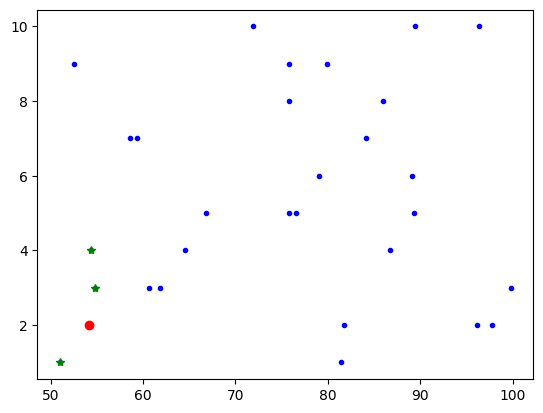

Классы, соответствующие К ближайшим соседям:
класс=A, количество элементов=1
класс=B, количество элементов=1
класс=C, количество элементов=1

**************************************
Проверяемая точка:  [nan, 1.0]
**************************************
Вывод отсортированного списка соседей:
X1=54.84, X2=3.0, y=A, расстояние=nan
X1=61.8, X2=3.0, y=B, расстояние=nan
X1=52.58, X2=9.0, y=C, расстояние=nan
X1=99.81, X2=3.0, y=B, расстояние=nan
X1=75.7776923076923, X2=9.0, y=A, расстояние=nan
X1=54.37, X2=4.0, y=C, расстояние=nan
X1=51.01, X2=1.0, y=B, расстояние=nan
X1=85.96, X2=8.0, y=B, расстояние=nan
X1=71.96, X2=10.0, y=A, расстояние=nan
X1=89.34, X2=5.0, y=A, расстояние=nan
X1=96.17, X2=2.0, y=B, расстояние=nan
X1=79.97, X2=9.0, y=B, расстояние=nan
X1=59.36, X2=7.0, y=B, расстояние=nan
X1=89.11, X2=6.0, y=C, расстояние=nan
X1=97.79, X2=2.0, y=C, расстояние=nan
X1=79.01, X2=6.0, y=B, расстояние=nan
X1=84.1, X2=7.0, y=C, расстояние=nan
X1=66.87, X2=5.0, y=A, расстояние=nan
X1=75.7776923076

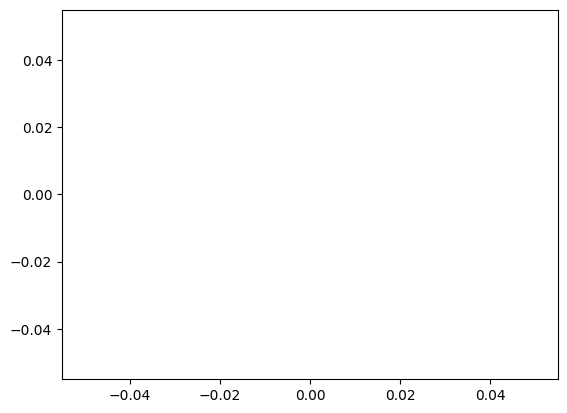

Вывод К ближайших соседей:
X1=54.84, X2=3.0, y=A, расстояние=nan
X1=61.8, X2=3.0, y=B, расстояние=nan
X1=52.58, X2=9.0, y=C, расстояние=nan

Визуализация К ближайших соседей:


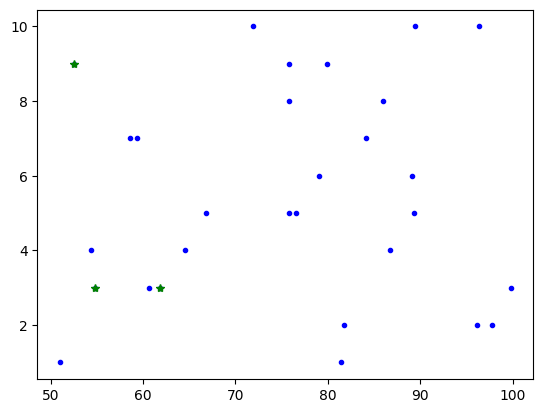

Классы, соответствующие К ближайшим соседям:
класс=A, количество элементов=1
класс=B, количество элементов=1
класс=C, количество элементов=1

**************************************
Проверяемая точка:  [57.6, 5.0]
**************************************
Вывод отсортированного списка соседей:
X1=58.58, X2=7.0, y=B, расстояние=2.23
X1=59.36, X2=7.0, y=B, расстояние=2.66
X1=54.37, X2=4.0, y=C, расстояние=3.38
X1=54.84, X2=3.0, y=A, расстояние=3.41
X1=60.6, X2=3.0, y=B, расстояние=3.61
X1=61.8, X2=3.0, y=B, расстояние=4.65
X1=52.58, X2=9.0, y=C, расстояние=6.42
X1=64.58, X2=4.0, y=A, расстояние=7.05
X1=51.01, X2=1.0, y=B, расстояние=7.71
X1=66.87, X2=5.0, y=A, расстояние=9.27
X1=71.96, X2=10.0, y=A, расстояние=15.21
X1=75.7776923076923, X2=5.0, y=C, расстояние=18.18
X1=75.7776923076923, X2=8.0, y=A, расстояние=18.42
X1=75.7776923076923, X2=9.0, y=A, расстояние=18.61
X1=76.6, X2=5.0, y=A, расстояние=19.00
X1=79.01, X2=6.0, y=B, расстояние=21.43
X1=79.97, X2=9.0, y=B, расстояние=22.72
X1=81.45

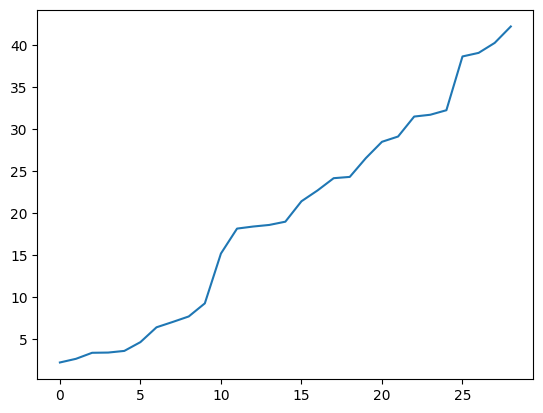

Вывод К ближайших соседей:
X1=58.58, X2=7.0, y=B, расстояние=2.23
X1=59.36, X2=7.0, y=B, расстояние=2.66
X1=54.37, X2=4.0, y=C, расстояние=3.38

Визуализация К ближайших соседей:


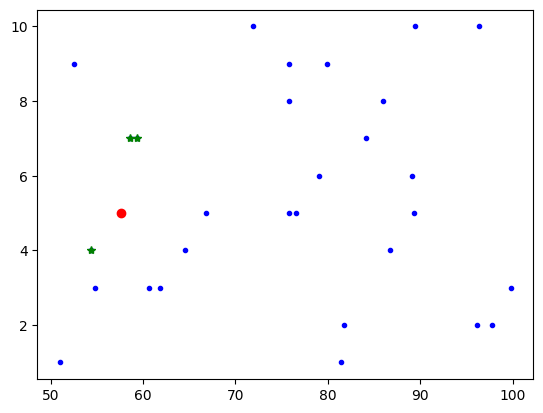

Классы, соответствующие К ближайшим соседям:
класс=B, количество элементов=2
класс=C, количество элементов=1

**************************************
Проверяемая точка:  [51.91, 4.0]
**************************************
Вывод отсортированного списка соседей:
X1=54.37, X2=4.0, y=C, расстояние=2.46
X1=54.84, X2=3.0, y=A, расстояние=3.10
X1=51.01, X2=1.0, y=B, расстояние=3.13
X1=52.58, X2=9.0, y=C, расстояние=5.04
X1=58.58, X2=7.0, y=B, расстояние=7.31
X1=59.36, X2=7.0, y=B, расстояние=8.03
X1=60.6, X2=3.0, y=B, расстояние=8.75
X1=61.8, X2=3.0, y=B, расстояние=9.94
X1=64.58, X2=4.0, y=A, расстояние=12.67
X1=66.87, X2=5.0, y=A, расстояние=14.99
X1=71.96, X2=10.0, y=A, расстояние=20.93
X1=75.7776923076923, X2=5.0, y=C, расстояние=23.89
X1=75.7776923076923, X2=8.0, y=A, расстояние=24.20
X1=75.7776923076923, X2=9.0, y=A, расстояние=24.39
X1=76.6, X2=5.0, y=A, расстояние=24.71
X1=79.01, X2=6.0, y=B, расстояние=27.17
X1=79.97, X2=9.0, y=B, расстояние=28.50
X1=81.45, X2=1.0, y=C, расстояние=29.

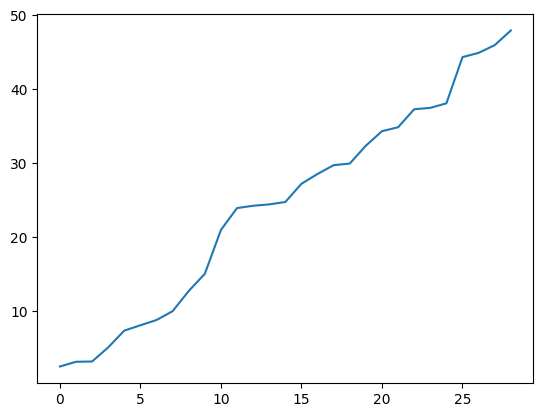

Вывод К ближайших соседей:
X1=54.37, X2=4.0, y=C, расстояние=2.46
X1=54.84, X2=3.0, y=A, расстояние=3.10
X1=51.01, X2=1.0, y=B, расстояние=3.13

Визуализация К ближайших соседей:


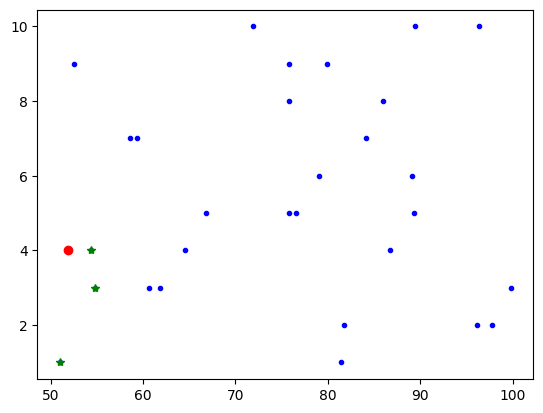

Классы, соответствующие К ближайшим соседям:
класс=A, количество элементов=1
класс=B, количество элементов=1
класс=C, количество элементов=1

**************************************
Проверяемая точка:  [85.97, 9.0]
**************************************
Вывод отсортированного списка соседей:
X1=85.96, X2=8.0, y=B, расстояние=1.00
X1=84.1, X2=7.0, y=C, расстояние=2.74
X1=89.49, X2=10.0, y=B, расстояние=3.66
X1=89.11, X2=6.0, y=C, расстояние=4.34
X1=86.73, X2=4.0, y=C, расстояние=5.06
X1=89.34, X2=5.0, y=A, расстояние=5.23
X1=79.97, X2=9.0, y=B, расстояние=6.00
X1=79.01, X2=6.0, y=B, расстояние=7.58
X1=81.75, X2=2.0, y=C, расстояние=8.17
X1=81.45, X2=1.0, y=C, расстояние=9.19
X1=76.6, X2=5.0, y=A, расстояние=10.19
X1=75.7776923076923, X2=9.0, y=A, расстояние=10.19
X1=75.7776923076923, X2=8.0, y=A, расстояние=10.24
X1=96.39, X2=10.0, y=B, расстояние=10.47
X1=75.7776923076923, X2=5.0, y=C, расстояние=10.95
X1=96.17, X2=2.0, y=B, расстояние=12.37
X1=97.79, X2=2.0, y=C, расстояние=13.74
X1=71

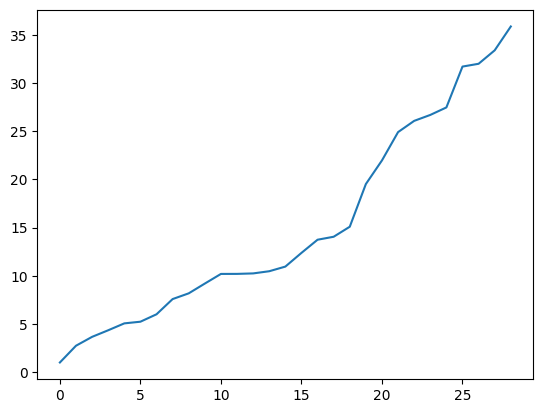

Вывод К ближайших соседей:
X1=85.96, X2=8.0, y=B, расстояние=1.00
X1=84.1, X2=7.0, y=C, расстояние=2.74
X1=89.49, X2=10.0, y=B, расстояние=3.66

Визуализация К ближайших соседей:


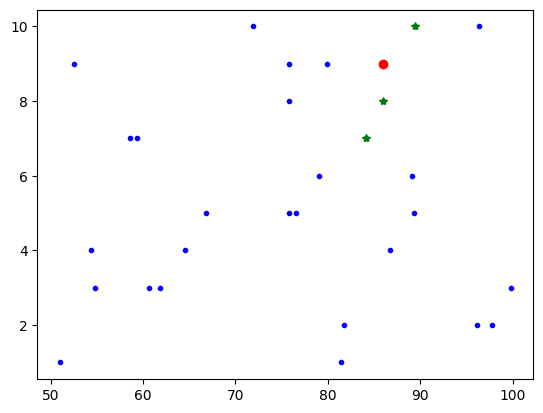

Классы, соответствующие К ближайшим соседям:
класс=B, количество элементов=2
класс=C, количество элементов=1

**************************************
Проверяемая точка:  [64.01, 10.0]
**************************************
Вывод отсортированного списка соседей:
X1=59.36, X2=7.0, y=B, расстояние=5.53
X1=66.87, X2=5.0, y=A, расстояние=5.76
X1=64.58, X2=4.0, y=A, расстояние=6.03
X1=58.58, X2=7.0, y=B, расстояние=6.20
X1=61.8, X2=3.0, y=B, расстояние=7.34
X1=60.6, X2=3.0, y=B, расстояние=7.79
X1=71.96, X2=10.0, y=A, расстояние=7.95
X1=54.37, X2=4.0, y=C, расстояние=11.35
X1=52.58, X2=9.0, y=C, расстояние=11.47
X1=54.84, X2=3.0, y=A, расстояние=11.54
X1=75.7776923076923, X2=9.0, y=A, расстояние=11.81
X1=75.7776923076923, X2=8.0, y=A, расстояние=11.94
X1=75.7776923076923, X2=5.0, y=C, расстояние=12.79
X1=76.6, X2=5.0, y=A, расстояние=13.55
X1=79.01, X2=6.0, y=B, расстояние=15.52
X1=51.01, X2=1.0, y=B, расстояние=15.81
X1=79.97, X2=9.0, y=B, расстояние=15.99
X1=81.75, X2=2.0, y=C, расстояние=1

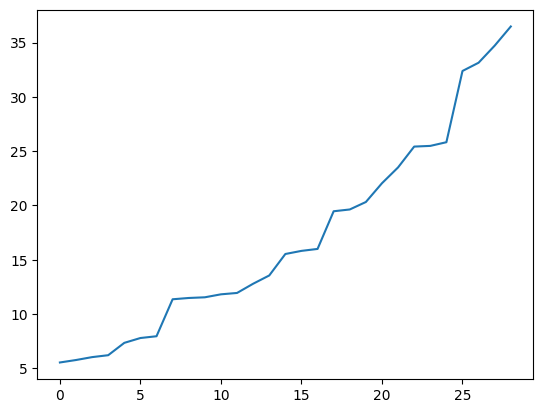

Вывод К ближайших соседей:
X1=59.36, X2=7.0, y=B, расстояние=5.53
X1=66.87, X2=5.0, y=A, расстояние=5.76
X1=64.58, X2=4.0, y=A, расстояние=6.03

Визуализация К ближайших соседей:


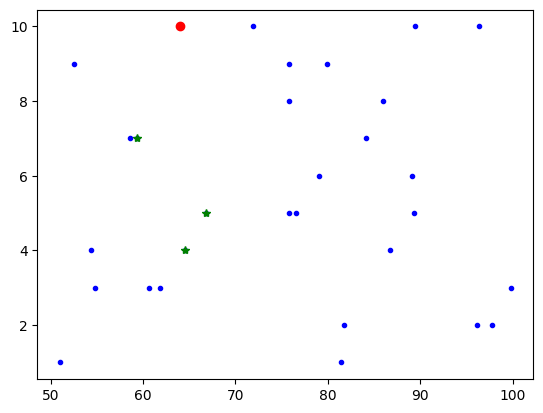

Классы, соответствующие К ближайшим соседям:
класс=A, количество элементов=2
класс=B, количество элементов=1


['C', 'B', 'B', 'B', 'A', 'A', 'B', 'A', 'B', 'A']

In [112]:
# Для всех объектов тестовой выборки (классификация)
simple_knn_clas_prediction = simple_knn_clas.predict(K=3, \
                          prediction_type=PredictionType.CLASSIFICATION, \
                          X_test=data_test[['Attendance (%)','Stress_Level (1-10)']])
simple_knn_clas_prediction

## [Использование классов scikit-learn](https://scikit-learn.org/stable/modules/neighbors.html)

- [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) - для решения задачи регрессии
- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) - для решения задачи классификации

Также существуют разновидности алгоритма, рассматривающие ближайших соседей в рамках некоторой окрестности (радиуса):
- [RadiusNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsRegressor.html)
- [RadiusNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html)

In [113]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

### Классификация

In [114]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifierObj

KNeighborsClassifier(n_neighbors=3)

In [115]:
KNeighborsClassifierObj.fit(data_train[['Attendance (%)','Stress_Level (1-10)']], data_train['y_clas'])
KNeighborsClassifierObj.predict(data_test[['Attendance (%)','Stress_Level (1-10)']])

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
simple_knn_clas = SimpleKNN()
simple_knn_clas.fit(data_train[['Attendance (%)','Stress_Level (1-10)']], data_train['y_clas'])
simple_knn_clas_prediction = simple_knn_clas.predict(K=3, \
                          prediction_type=PredictionType.CLASSIFICATION, \
                          X_test=data_test[['Attendance (%)','Stress_Level (1-10)']], verbose = False)
np.array(simple_knn_clas_prediction)

array(['C', 'B', 'B', 'B', 'A', 'A', 'B', 'A', 'B', 'A'], dtype='<U1')

### Регрессия

In [ ]:
KNeighborsRegressorObj = KNeighborsRegressor()
KNeighborsRegressorObj

KNeighborsRegressor()

In [ ]:
KNeighborsRegressorObj.fit(data_train[['Attendance (%)','Stress_Level (1-10)']], data_train['Final_Score'])
KNeighborsRegressorObj.predict(data_test[['Attendance (%)','Stress_Level (1-10)']])

ValueError: Input X contains NaN.
KNeighborsRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
simple_knn_regr = SimpleKNN()
simple_knn_regr.fit(data_train[['Attendance (%)','Stress_Level (1-10)']], data_train['Final_Score'])
simple_knn_regr_prediction = simple_knn_regr.predict(K=5, \
                          prediction_type=PredictionType.REGRESSION, \
                          X_test=data_test[['Attendance (%)','Stress_Level (1-10)']], verbose = False)
np.array(simple_knn_regr_prediction)

array([68.542, 66.13 , 79.538, 65.366, 74.512, 78.166, 79.538, 68.542,
       56.838, 80.204])

## Достоинства и недостатки

### Достоинства 
- Простота и универсальность метода.
- Возможность использования для классификации и регрессии.
- Возможность использования для обучения без учителя.

### Недостатки
- Метод в целом считается не очень точным.
- Зависимость от гиперпараметра K.
- При большом количестве точек перебор и вычисление расстояния занимают много времени. Для этого используются различные методы ускорения алгоритма - https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms, в частности [KDTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html) и [BallTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html).
- Статья, посвященная алгоритму [BallTree.](http://people.ee.duke.edu/~lcarin/liu06a.pdf)

## Особенности алгоритма

### Обучение без учителя
Поскольку метод фактически не строит модель $M$ и для поиска ближайших соседей использует только меру близости между $X^{train}$ и $X^{test}$, то в некоторых случаях $Y^{train}$ игнорируют, и метод k-NN рассматривают как один из методов обучения без учителя. В этом случае k-NN можно рассматривать как специфическую разновидность алгоритма кластеризации - http://scikit-learn.org/stable/modules/neighbors.html

### Масштабирование признаков
Если признаки лежат в различных диапазонах, то необходимо их масштабировать с использованием MinMax масштабирования или масштабирования на основе Z-оценки.